# Data Analysis Script for Exposure


In [1]:
#Importing Necessary Packages

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pystout import pystout
from tabulate import tabulate
import latextable

In [2]:
def confint(data):
    ci = 1.96 * np.std(data) / np.sqrt(len(data)-1)
    return ci

# Importing the Data

In [3]:
#Import Data
raw_data = pd.read_csv('ClimateChangeCalendar.csv')

raw_data


,HHID,Consent,IWDate,IWTime,IntrvrID,A1_72,A1_73,A1_74,A1_75,A1_76,...,E28_76,E28_77,E28_78,E29_72,E29_73,E29_74,E29_75,E29_76,E29_77,E29_78
0,2301006,1,20790230,31,166,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2301007,1,20790230,27,166,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2301013,1,20790230,17,166,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2301016,1,20790231,34,166,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2301017,1,20790231,43,166,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1,20790213,31,49,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
496,2611115,1,20790218,29,166,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
497,2611117,1,20790218,27,242,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1
498,2611118,1,20790217,40,21,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,1


# Extracting Climate Exposure Data (Section E)


In [6]:
#Cleaning the data
raw_data.replace(' ',0, inplace=True)
climate_exposure = pd.DataFrame()
climate_exposure['HHID'] = raw_data['HHID']

for item in raw_data.columns:
    
    if 'E1' in item or 'E2' in item:
        
        climate_exposure[item] = raw_data[item].astype(float)
        
climate_exposure

,HHID,E19_72,E19_73,E19_74,E19_75,E19_76,E19_77,E19_78,E20_72,E20_73,...,E28_76,E28_77,E28_78,E29_72,E29_73,E29_74,E29_75,E29_76,E29_77,E29_78
0,2301006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2301007,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2301013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2301016,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2301017,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
496,2611115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
497,2611117,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
498,2611118,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
pivoted_exposure = pd.wide_to_long(climate_exposure, ["E19", "E20", "E21", "E22", "E23", "E24", "E25", "E26", "E27", "E28", "E29"], i='HHID', j="Year", sep='_').reset_index()
col_names = ['DroughtExp', 'FloodExp', 'GroundwaterExp', 'HeatExp', 'PestsExp', 'FrostExp', 'HailExp', 'Irrigation', 'Groundwater_Use', 'Insurance', 'Animals']

dict2 = {}
for key, value in zip(pivoted_exposure.columns[2:], col_names):
    dict2[key] = value
    
pivoted_exposure.rename(columns=dict2, inplace=True)

pivoted_exposure.to_csv('AnnualExposure.csv')
pivoted_exposure

,HHID,Year,DroughtExp,FloodExp,GroundwaterExp,HeatExp,PestsExp,FrostExp,HailExp,Irrigation,Groundwater_Use,Insurance,Animals
0,2301006,72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2301007,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2301013,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2301016,72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2301017,72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611114,78,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3496,2611115,78,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3497,2611117,78,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3498,2611118,78,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


0.31
             HHID  DroughtExp  FloodExp  GroundwaterExp  HeatExp  PestsExp  \
Year                                                                         
72    2455586.826       0.260     0.108           0.080    0.092     0.674   
73    2455586.826       0.258     0.114           0.078    0.094     0.668   
74    2455586.826       0.274     0.108           0.084    0.096     0.688   
75    2455586.826       0.274     0.108           0.078    0.102     0.702   
76    2455586.826       0.268     0.150           0.080    0.102     0.752   
77    2455586.826       0.278     0.440           0.082    0.110     0.800   
78    2455586.826       0.310     0.570           0.078    0.118     0.808   

      FrostExp  HailExp  Irrigation  Groundwater_Use  Insurance  Animals  
Year                                                                      
72       0.414    0.010       0.094            0.074      0.002    0.594  
73       0.408    0.014       0.094            0.076      0.002    

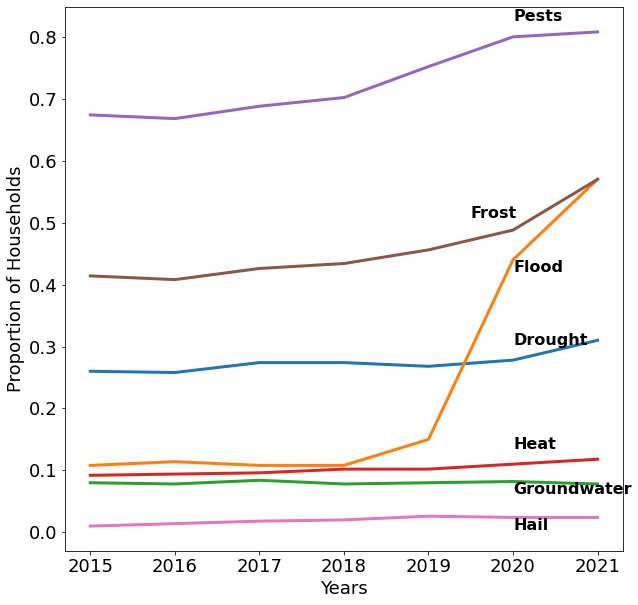

In [8]:
#Summing Self-reported Exposures for Each Year

annual_exposure = pivoted_exposure.groupby('Year').mean()

f, ax = plt.subplots(figsize=[10,10])

years = np.arange(2015,2022, 1)

hazards = ['Drought', 'Flood', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail']
print(annual_exposure['DroughtExp'].iloc[-1])
                          
for item in hazards:
    ax.plot(years, annual_exposure[item + 'Exp'], label = item, lw=3)
    if item == 'Groundwater' or item == 'Hail' or item=='Flood':
        ax.text(2020, annual_exposure[item + 'Exp'].iloc[-2] - 0.02, item, fontsize=16, weight='bold')
    elif item == 'Frost':
        ax.text(2019.5, annual_exposure[item + 'Exp'].iloc[-2] + 0.02, item, fontsize=16, weight='bold')
    else:
        ax.text(2020, annual_exposure[item + 'Exp'].iloc[-2] + 0.025, item, fontsize=16, weight='bold')
        
        
print(annual_exposure)
#ax.set_ylim([0,0.8])
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Proportion of Households', fontsize=18)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.legend(fontsize=16, loc = 'upper left')
plt.show()
#plt.savefig('AnnualExposure.png', bbox_inches='tight')

# Calculating Sums for Each Major Climate Event
This next cell calculates the sum for each household of the main climate events 

In [9]:
sum_exposure = pivoted_exposure.groupby('HHID').sum()
sum_exposure.drop(labels=['Year'], axis=1, inplace=True)


sum_exposure


,DroughtExp,FloodExp,GroundwaterExp,HeatExp,PestsExp,FrostExp,HailExp,Irrigation,Groundwater_Use,Insurance,Animals
HHID,,,,,,,,,,,
2301006,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2301007,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2301013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2301016,2.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
2301017,3.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2611114,1.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0
2611115,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
2611117,1.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0


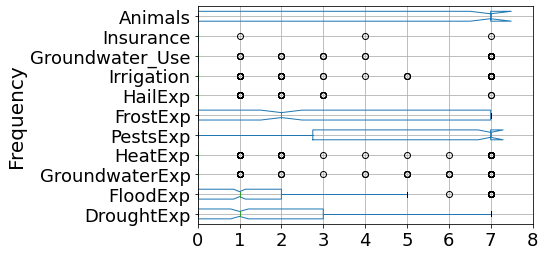

In [10]:
event_types = len(sum_exposure.columns)

means = np.zeros(event_types)
std = np.zeros(event_types)

f, ax1 = plt.subplots() 

for i, name in enumerate(sum_exposure.columns):

    means[i] = sum_exposure[name].mean()
    std[i] = sum_exposure[name].std()
    
sum_exposure.boxplot(notch=True, patch_artist=False, vert=False)
#key_events = sum_exposure[['Drought', 'Flood', 'Pests', 'Frost', 'Animals']]
#key_events.boxplot(notch=True, vert=False)

ax1.set_xlim([0,8])
plt.ylabel('Frequency', size=20)
plt.yticks(size=18)
plt.xticks(size=18)
plt.show()

#plt.savefig('ClimateExposure.png', bbox_inches='tight')


In [11]:
#Creating Standardized Exposure Index

#sum_exposure['HazardNumber'] = 0

narrow_exposure = sum_exposure[['DroughtExp', 'FloodExp', 'PestsExp', 'FrostExp', 'HailExp', 'HeatExp', 'GroundwaterExp']].reset_index()
narrow_exposure['HazardNumber'] = narrow_exposure.gt(0).sum(axis=1) - 1

mean_value = narrow_exposure['HazardNumber'].mean()
std_value = np.std(narrow_exposure['HazardNumber'])
print(std_value)
narrow_exposure['HazardIndex'] = (narrow_exposure['HazardNumber'] - mean_value) / std_value

narrow_exposure.to_csv('Narrow_exposure.csv')

narrow_exposure

1.3225596394870034


,HHID,DroughtExp,FloodExp,PestsExp,FrostExp,HailExp,HeatExp,GroundwaterExp,HazardNumber,HazardIndex
0,2301006,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2,-0.827184
1,2301007,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2,-0.827184
2,2301013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,-1.583293
3,2301016,2.0,1.0,7.0,0.0,0.0,0.0,0.0,3,-0.071074
4,2301017,3.0,1.0,7.0,0.0,0.0,0.0,0.0,3,-0.071074
...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,1.0,7.0,0.0,0.0,0.0,0.0,3,-0.071074
496,2611115,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2,-0.827184
497,2611117,1.0,0.0,7.0,0.0,0.0,0.0,0.0,2,-0.827184
498,2611118,4.0,7.0,7.0,7.0,0.0,0.0,0.0,4,0.685035


In [13]:
# Grouping by Sub-ward Level
narrow_exposure['Subward'] = narrow_exposure['HHID'].astype(str).str[:4].astype(int)

#Creating subward averages for each source
subward_exposure = pd.DataFrame()
years = 7 #Number of years in panel dataset

for col in narrow_exposure.columns[1:8]:
    subward_exposure[col] = narrow_exposure.groupby('Subward')[col].mean() / years
    

subward_exposure.reset_index().to_csv('Subward_Exposure.csv')


,HHID,DroughtExp,FloodExp,PestsExp,FrostExp,HailExp,HeatExp,GroundwaterExp,HazardNumber,HazardIndex,Subward
0,2301006,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2,-0.827184,2301
1,2301007,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2,-0.827184,2301
2,2301013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,-1.583293,2301
3,2301016,2.0,1.0,7.0,0.0,0.0,0.0,0.0,3,-0.071074,2301
4,2301017,3.0,1.0,7.0,0.0,0.0,0.0,0.0,3,-0.071074,2301
...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,1.0,7.0,0.0,0.0,0.0,0.0,3,-0.071074,2611
496,2611115,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2,-0.827184,2611
497,2611117,1.0,0.0,7.0,0.0,0.0,0.0,0.0,2,-0.827184,2611
498,2611118,4.0,7.0,7.0,7.0,0.0,0.0,0.0,4,0.685035,2611


# Histogram for each Climate Event

The code below generates a histogram for a specific climate event, to better understand the distribution of farmers based on self-reported experience.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


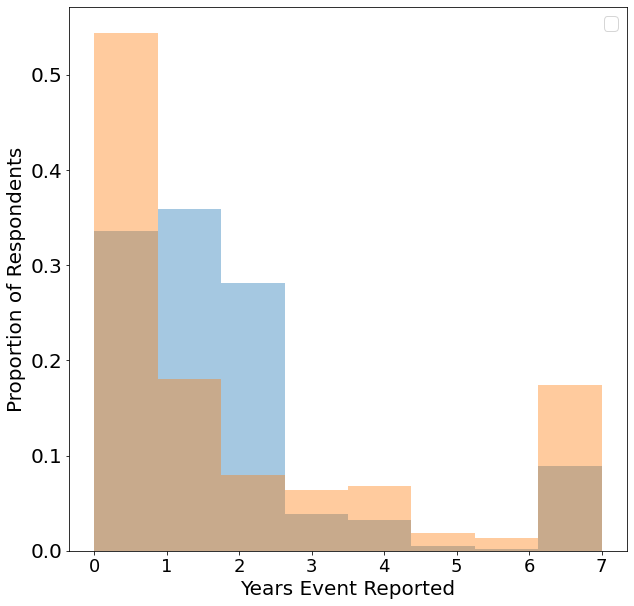

In [9]:
#Histogram for specific climate event

events = ['Flood', 'Drought']
f, ax1 = plt.subplots(figsize=[10,10])

for item in events:
    data = sum_exposure[item]
    ax1.hist(data, bins=8, density=True, alpha=0.4)
    
ax1.set_xlabel('Years Event Reported', size=20)
ax1.set_ylabel('Proportion of Respondents', size=20)
plt.xticks(size=18)
plt.yticks(size=20)
plt.legend(fontsize=18)
plt.show()

#plt.savefig('EventHistogram_DroughtFlood.png', bbox_inches='tight')


# Analyzing Livelihood Strategies

This includes Sections A-D in Calendar data


In [10]:
#Cleaning the data

raw_data.replace(' ',0, inplace=True)
livelihoods = pd.DataFrame()
livelihoods['HHID'] = raw_data['HHID']

target_columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'B9', 'B10', 'B11', 'C12', 'C13', 'D14', 'D15', 'D16']

for item in raw_data.columns:
    
    for col in target_columns:
        if col in item:        
            livelihoods[item] = raw_data[item].astype(float)
        
livelihoods

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/3135998559.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/3135998559.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/3135998559.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/3135998559.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/3135998559.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/3135998559.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/3135998559.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/3135998559.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  livelihoods[item] = raw_data[item].astype(float)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/3135998559.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

,HHID,A1_72,A1_73,A1_74,A1_75,A1_76,A1_77,A1_78,A1a_72,A1a_73,...,D16_76,D16_77,D16_78,D16a_72,D16a_73,D16a_74,D16a_75,D16a_76,D16a_77,D16a_78
0,2301006,1.0,1.0,0.0,0.0,0.0,1.0,1.0,20.0,20.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,2301007,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,-1.0,...,1.0,0.0,0.0,72000.0,75000.0,77000.0,80000.0,90000.0,-1.0,-1.0
2,2301013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.5,4.5,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,2301016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,8.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,2301017,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,7.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15.0,15.0,...,3.0,3.0,3.0,198000.0,198000.0,198000.0,198000.0,324000.0,324000.0,324000.0
496,2611115,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0,11.0,...,1.0,1.0,2.0,-1.0,-1.0,200000.0,220000.0,240000.0,210000.0,300000.0
497,2611117,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40.0,40.0,...,1.0,1.0,0.0,150000.0,150000.0,160000.0,170000.0,145000.0,150000.0,-1.0
498,2611118,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,20.0,...,1.0,1.0,1.0,20000.0,21000.0,22000.0,20000.0,22000.0,23000.0,22000.0


In [11]:
#Selecting Only Columns related to (1) land planted for crops; (2) number of migrants; and (3) non-farm jobs

main_livelihoods = pd.DataFrame()
main_livelihoods['HHID'] = livelihoods['HHID']

target_livelihoods = ['A1a', 'A2a', 'A3a', 'A4a', 'A5a', 'C12_', 'C13_', 'D14_', 'D15_', 'D16_'] #Livelihoods we want to analyze

for col in livelihoods.columns:
    for item in target_livelihoods:
        if item in col:
            main_livelihoods[col] = livelihoods[col].astype(float)

main_livelihoods

main_livelihoods[['C12_77', 'C12_78']]
        


,C12_77,C12_78
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,4.0,4.0
4,0.0,0.0
...,...,...
495,0.0,0.0
496,0.0,0.0
497,0.0,0.0
498,0.0,0.0


In [12]:
#Pivoting data from wide to long

column_heads = []

for item in target_livelihoods:
    if '_' in item:
        column_heads.append(item[:-1])
    else:
        column_heads.append(item)

pivoted_livelihoods = pd.wide_to_long(main_livelihoods, column_heads, i='HHID', j="Year", sep='_').reset_index()

pivoted_livelihoods[pivoted_livelihoods < 0] = 0

pivoted_livelihoods

,HHID,Year,A1a,A2a,A3a,A4a,A5a,C12,C13,D14,D15,D16
0,2301006,72,20.0,20.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2301007,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2301013,72,4.5,4.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0
3,2301016,72,8.0,8.0,0.0,8.0,0.0,4.0,0.0,1.0,0.0,0.0
4,2301017,72,7.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611114,78,15.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,3.0
3496,2611115,78,11.0,4.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0
3497,2611117,78,40.0,11.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,0.0
3498,2611118,78,20.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
#Calculating yearly sums across all respondents
sum_livelihoods = pivoted_livelihoods.groupby('Year').sum()

sum_livelihoods.drop(labels=['HHID'], axis=1, inplace=True)
sum_livelihoods


,A1a,A2a,A3a,A4a,A5a,C12,C13,D14,D15,D16
Year,,,,,,,,,,
72,5467.25,3444.05,32.5,2984.5,86.75,39.0,150.0,41.0,72.0,163.0
73,5525.75,3454.55,62.5,3044.0,81.75,41.0,156.0,45.0,71.0,165.0
74,5453.75,3401.55,32.5,3027.0,123.75,43.0,155.0,47.0,79.0,173.0
75,5418.20,3336.50,28.5,3079.5,122.75,42.0,166.0,53.0,90.0,174.0
76,5561.20,3530.00,33.5,3256.0,150.75,41.0,172.0,61.0,94.0,187.0
77,5560.80,3600.70,87.5,3393.0,249.75,49.0,170.0,71.0,103.0,206.0
78,5512.00,3638.70,148.5,3500.5,285.25,52.0,190.0,93.0,111.0,220.0


In [14]:
#Re-scaling livelihoods.
#Farm-based livelihoods (A...) are expressed as proportion of total land planted.
#Other livelihoods are expressed as proportion of households

total_land = np.zeros(len(sum_livelihoods))

for i in range(len(sum_livelihoods)):
    total_land[i] = sum_livelihoods.iloc[i,0:5].sum()

sum_livelihoods['Total_Land'] = total_land

livelihood_proportion = pd.DataFrame()
#livelihood_proportion['Year'] = sum_livelihoods['Year']

for col in sum_livelihoods.columns:
    if 'A' in col:
        livelihood_proportion[col] = sum_livelihoods[col] / sum_livelihoods['Total_Land']
    else:
        livelihood_proportion[col] = sum_livelihoods[col] / len(main_livelihoods)

livelihood_proportion

,A1a,A2a,A3a,A4a,A5a,C12,C13,D14,D15,D16,Total_Land
Year,,,,,,,,,,,
72,0.455033,0.286645,0.002705,0.248397,0.007220,0.078,0.300,0.082,0.144,0.326,24.0301
73,0.454101,0.283892,0.005136,0.250153,0.006718,0.082,0.312,0.090,0.142,0.330,24.3371
74,0.453024,0.282555,0.002700,0.251442,0.010279,0.086,0.310,0.094,0.158,0.346,24.0771
75,0.452065,0.278379,0.002378,0.256937,0.010242,0.084,0.332,0.106,0.180,0.348,23.9709
76,0.443779,0.281691,0.002673,0.259826,0.012030,0.082,0.344,0.122,0.188,0.374,25.0629
77,0.431346,0.279303,0.006787,0.263192,0.019373,0.098,0.340,0.142,0.206,0.412,25.7835
78,0.421247,0.278083,0.011349,0.267521,0.021800,0.104,0.380,0.186,0.222,0.440,26.1699


In [15]:
#Aggregating Column Names

#livelihood_proportion['Cereal_Crops'] = livelihood_proportion['A1a']
cereal_crops = np.zeros(len(livelihood_proportion))
cash_crops = np.zeros(len(livelihood_proportion))
migration = np.zeros(len(livelihood_proportion))
local_migration = np.zeros(len(livelihood_proportion))
intl_migration = np.zeros(len(livelihood_proportion))
nonfarm = np.zeros(len(livelihood_proportion))

for i in range(len(livelihood_proportion)):
    cereal_crops[i] = livelihood_proportion.iloc[i,0:3].sum()
    cash_crops[i] = livelihood_proportion.iloc[i,3:5].sum()
    migration[i] = livelihood_proportion.iloc[i,5:7].sum()
    local_migration[i] = livelihood_proportion.iloc[i,5:6].sum()
    intl_migration[i] = livelihood_proportion.iloc[i,6:7].sum()
    nonfarm[i] = livelihood_proportion.iloc[i,7:10].sum()

livelihood_proportion['Cereal Crops'] = cereal_crops
livelihood_proportion['Cash Crops'] = cash_crops
livelihood_proportion['Total Migration'] = migration
livelihood_proportion['Local Migration'] = local_migration
livelihood_proportion['Intl Migration'] = intl_migration
livelihood_proportion['NonFarm Jobs'] = nonfarm


livelihood_proportion.reset_index()

,Year,A1a,A2a,A3a,A4a,A5a,C12,C13,D14,D15,D16,Total_Land,Cereal Crops,Cash Crops,Total Migration,Local Migration,Intl Migration,NonFarm Jobs
0,72,0.455033,0.286645,0.002705,0.248397,0.007220,0.078,0.300,0.082,0.144,0.326,24.0301,0.744383,0.255617,0.378,0.078,0.300,0.552
1,73,0.454101,0.283892,0.005136,0.250153,0.006718,0.082,0.312,0.090,0.142,0.330,24.3371,0.743129,0.256871,0.394,0.082,0.312,0.562
2,74,0.453024,0.282555,0.002700,0.251442,0.010279,0.086,0.310,0.094,0.158,0.346,24.0771,0.738278,0.261722,0.396,0.086,0.310,0.598
3,75,0.452065,0.278379,0.002378,0.256937,0.010242,0.084,0.332,0.106,0.180,0.348,23.9709,0.732822,0.267178,0.416,0.084,0.332,0.634
4,76,0.443779,0.281691,0.002673,0.259826,0.012030,0.082,0.344,0.122,0.188,0.374,25.0629,0.728144,0.271856,0.426,0.082,0.344,0.684
5,77,0.431346,0.279303,0.006787,0.263192,0.019373,0.098,0.340,0.142,0.206,0.412,25.7835,0.717436,0.282564,0.438,0.098,0.340,0.760
6,78,0.421247,0.278083,0.011349,0.267521,0.021800,0.104,0.380,0.186,0.222,0.440,26.1699,0.710679,0.289321,0.484,0.104,0.380,0.848


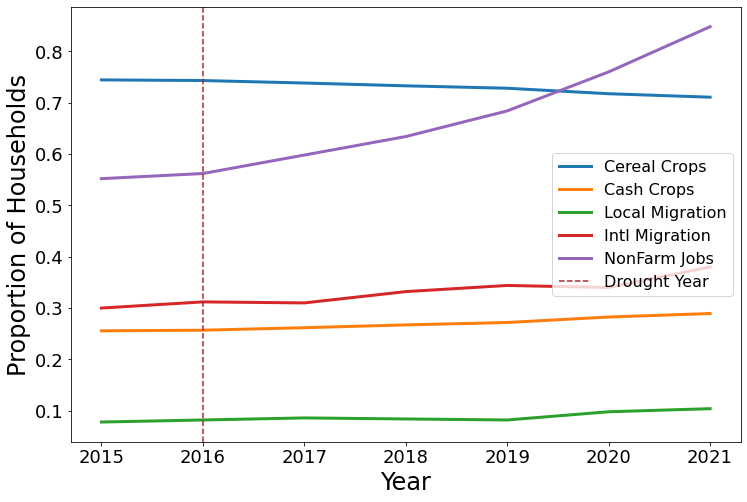

In [16]:
#Plotting Data
x = np.linspace(2015, 2021, 7)
f, ax1 = plt.subplots(figsize=[12,8]) 

strategies = ['Cereal Crops', 'Cash Crops', 'Local Migration', 'Intl Migration', 'NonFarm Jobs']
for item in strategies:
    ax1.plot(x, livelihood_proportion[item], label=item, lw=3)

ax1.set_ylabel('Proportion of Households', size=24)
ax1.set_xlabel('Year', size=24)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.axvline(x=2013, ls='--', label = 'Flood')
plt.axvline(x=2016, ls='--', color = 'brown', label = 'Drought Year')
plt.legend(fontsize=16)
plt.show()

#plt.savefig('LivelihoodChoices.png', bbox_inches='tight')

# Section E: Livelihood Intentions

In [17]:
#Loading Livelihood Intentions
raw_data = pd.read_csv('ClimateChangeData.csv')

intentions = pd.DataFrame()

intentions['HHID'] = raw_data['HHID']

for col in raw_data.columns:
    if 'E1' in col or 'E2' in col or 'E3' in col:
        intentions[col] = raw_data[col]
        
intentions


,HHID,E1_1,E1_2,E1_3,E1_4,E1_5,E1_6,E1_7,E1_8,E1_9,...,E3_6,E3_7,E3_8,E3_9,E3_10,E3_11,E3_12,E3_97,E3_97_1,E3_97_1_1
0,2301006,3,3,3,3,3,2,3,3,2,...,3,2,2,1,3,1,3,0,-1,-1
1,2301007,2,2,2,2,2,2,2,3,3,...,3,1,2,2,1,1,1,0,-1,-1
2,2301013,2,1,2,1,2,2,2,2,3,...,3,1,2,2,2,1,1,0,-1,-1
3,2301016,3,3,2,2,3,2,2,3,3,...,3,3,3,3,1,1,3,0,-1,-1
4,2301017,3,3,2,2,2,3,2,3,2,...,3,1,2,1,2,1,1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,2,3,3,3,2,2,1,3,2,...,3,3,3,1,2,3,1,0,-1,-1
496,2611115,2,2,2,2,2,2,3,3,3,...,3,1,1,1,1,3,3,0,-1,-1
497,2611117,1,2,1,2,1,2,2,1,3,...,3,2,2,2,2,1,1,0,-1,-1
498,2611118,3,3,3,2,2,2,3,3,3,...,3,1,1,1,1,3,3,0,-1,-1


In [18]:
#Cleaning Column Heads

questions = {'E1':'Riskiness', 'E2':'Intention', 'E3':'PolicyIntention'}
livelihoods = ['CerealCrops', 'Non-CerealCrops', 'Fruit/Veg', 'LargeAnimal', 'SmallAnimal', 'Poultry', 'LocalMigrate', 'IntlMigrate', 'Business', 'Salary', 'Wage', 'Pension', 'Other', 'Other-Specify', 'Other-Specify2']

column_names = {}
for i, col in enumerate(intentions.columns[1:]):
    c_index = int(i/15)
    l_index = int(i % 15)
    if c_index == 0:
        column_names[col] = 'Riskiness_'+ livelihoods[l_index]
    elif c_index == 1:
        column_names[col] = 'Intention_'+ livelihoods[l_index]
    else:
        column_names[col] = 'PolicyIntention_'+ livelihoods[l_index]

        
intentions.rename(columns=column_names, inplace=True)


intentions
    

,HHID,Riskiness_CerealCrops,Riskiness_Non-CerealCrops,Riskiness_Fruit/Veg,Riskiness_LargeAnimal,Riskiness_SmallAnimal,Riskiness_Poultry,Riskiness_LocalMigrate,Riskiness_IntlMigrate,Riskiness_Business,...,PolicyIntention_Poultry,PolicyIntention_LocalMigrate,PolicyIntention_IntlMigrate,PolicyIntention_Business,PolicyIntention_Salary,PolicyIntention_Wage,PolicyIntention_Pension,PolicyIntention_Other,PolicyIntention_Other-Specify,PolicyIntention_Other-Specify2
0,2301006,3,3,3,3,3,2,3,3,2,...,3,2,2,1,3,1,3,0,-1,-1
1,2301007,2,2,2,2,2,2,2,3,3,...,3,1,2,2,1,1,1,0,-1,-1
2,2301013,2,1,2,1,2,2,2,2,3,...,3,1,2,2,2,1,1,0,-1,-1
3,2301016,3,3,2,2,3,2,2,3,3,...,3,3,3,3,1,1,3,0,-1,-1
4,2301017,3,3,2,2,2,3,2,3,2,...,3,1,2,1,2,1,1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,2,3,3,3,2,2,1,3,2,...,3,3,3,1,2,3,1,0,-1,-1
496,2611115,2,2,2,2,2,2,3,3,3,...,3,1,1,1,1,3,3,0,-1,-1
497,2611117,1,2,1,2,1,2,2,1,3,...,3,2,2,2,2,1,1,0,-1,-1
498,2611118,3,3,3,2,2,2,3,3,3,...,3,1,1,1,1,3,3,0,-1,-1


In [19]:
#Rescale intentions so that 0 = 'Not likely', 0.5 = 'Somewhat Likely', 1 = 'Highly Likely'
rescale_intentions = pd.DataFrame()

rescale_intentions['HHID'] = intentions['HHID']

for col in intentions.columns:
    if 'Intention_' in col:
        rescale_intentions[col] = (intentions[col] - 1) / 2

rescale_intentions

,HHID,Intention_CerealCrops,Intention_Non-CerealCrops,Intention_Fruit/Veg,Intention_LargeAnimal,Intention_SmallAnimal,Intention_Poultry,Intention_LocalMigrate,Intention_IntlMigrate,Intention_Business,...,PolicyIntention_Poultry,PolicyIntention_LocalMigrate,PolicyIntention_IntlMigrate,PolicyIntention_Business,PolicyIntention_Salary,PolicyIntention_Wage,PolicyIntention_Pension,PolicyIntention_Other,PolicyIntention_Other-Specify,PolicyIntention_Other-Specify2
0,2301006,0.0,0.5,0.0,0.0,0.5,1.0,0.5,0.5,0.0,...,1.0,0.5,0.5,0.0,1.0,0.0,1.0,-0.5,-1.0,-1.0
1,2301007,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.5,0.5,...,1.0,0.0,0.5,0.5,0.0,0.0,0.0,-0.5,-1.0,-1.0
2,2301013,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5,0.5,...,1.0,0.0,0.5,0.5,0.5,0.0,0.0,-0.5,-1.0,-1.0
3,2301016,0.5,0.5,0.0,0.5,0.5,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-0.5,-1.0,-1.0
4,2301017,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.5,0.0,...,1.0,0.0,0.5,0.0,0.5,0.0,0.0,-0.5,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,1.0,0.5,0.0,0.5,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.5,1.0,0.0,-0.5,-1.0,-1.0
496,2611115,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.5,-1.0,-1.0
497,2611117,1.0,1.0,0.5,1.0,1.0,1.0,0.5,0.5,0.5,...,1.0,0.5,0.5,0.5,0.5,0.0,0.0,-0.5,-1.0,-1.0
498,2611118,1.0,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.5,-1.0,-1.0


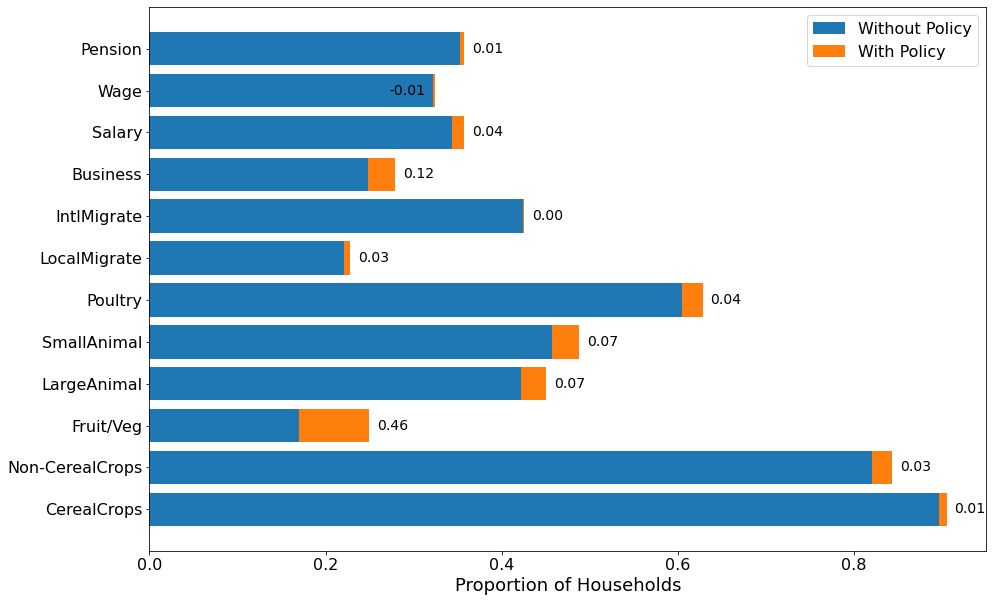

In [20]:
xpos = np.arange(0,12,1)

current_intentions = rescale_intentions.iloc[:,1:13]
future_intentions = rescale_intentions.iloc[:, -15:-3]

y_values = []
y_add = []
y_pct = []
labels = []
for col, pol in zip(current_intentions.columns, future_intentions.columns):
    y_values.append(current_intentions[col].sum() / len(rescale_intentions))
    y_add.append((future_intentions[pol].sum() - current_intentions[col].sum()) / len(rescale_intentions))
    y_pct.append(y_add[-1] / y_values[-1])
    labels.append(col[10:])

fig, ax = plt.subplots(figsize=[15,10])

b1 = ax.barh(xpos, y_values, )
b2 = ax.barh(xpos, y_add, left=y_values)
#plt.bar_label(y_pct, fmt='%.2f')
ax.bar_label(b2, labels=['%.2f' % e for e in y_pct],
             padding=8, color='black', fontsize=14)
plt.legend([b1,b2], ['Without Policy', 'With Policy'], fontsize=16)
plt.yticks(xpos, labels, fontsize=16)
plt.xticks(size=16)
plt.xlabel('Proportion of Households', fontsize=18)

plt.show()
#plt.savefig('PolicyEffects.png', bbox_inches='tight')


In [21]:
#Collapse livelihood intentions into fewer categories

categories = {'Cereal Crops': ['CerealCrops'], 'Cash Crops': ['Non-CerealCrops', 'Fruit/Veg'], 'Livestock': ['LargeAnimal', 'SmallAnimal', 'Poultry'], 'LocalMigrate': ['LocalMigrate'], 'IntlMigrate': ['IntlMigrate'], 'NonFarm Jobs': ['Business', 'Salary', 'Wage']}

simplified_intentions = pd.DataFrame()

simplified_intentions['HHID'] = rescale_intentions['HHID']

simplified_intentions['Cereal Crops'] = rescale_intentions['Intention_CerealCrops']
simplified_intentions['Cash Crops'] = max(rescale_intentions['Intention_Non-CerealCrops'], rescale_intentions['Intention_Fruit/Veg'])


#for col in simplified_intentions.columns[1:13]:
    #simplified_intentions




ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Analyzing Sources of Income

In [17]:
raw_income = pd.DataFrame()
income_titles = ['Farming', 'MeatMilk', 'SmallAnimals', 'Poultry', 'LocalRemit', 'IntilRemit', 'Business', 'Salary', 'WageLabor', 'Pension', 'Other']

raw_income['HHID'] = raw_data['HHID']

income_columns = ['A6_', 'B9b_', 'B10a_', 'B11a_', 'C12a_', 'C13a_', 'D14a_', 'D15a_', 'D16a_', 'D17a_', 'D18a_']

for col in raw_data.columns:
    for item, title in zip(income_columns, income_titles):
        if item in col:
            raw_income[col] = raw_data[col].astype(float)

raw_income.replace(-1, 0, inplace=True)

raw_income

,HHID,A6_72,A6_73,A6_74,A6_75,A6_76,A6_77,A6_78,B9b_72,B9b_73,...,D17a_76,D17a_77,D17a_78,D18a_72,D18a_73,D18a_74,D18a_75,D18a_76,D18a_77,D18a_78
0,2301006,25000.0,28000.0,0.0,0.0,0.0,35000.0,40000.0,120000.0,150000.0,...,160000.0,170000.0,180000.0,0.0,0.0,0.0,360000.0,360000.0,360000.0,360000.0
1,2301007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,12000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2301013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22000.0,22000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2301016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,0.0,...,140000.0,140000.0,156000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2301017,18000.0,19000.0,20000.0,20000.0,35000.0,35000.0,40000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,15000.0,13500.0,13500.0,15000.0,15000.0,0.0,16000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,2611115,10000.0,15000.0,11000.0,13000.0,12000.0,14000.0,11000.0,0.0,0.0,...,48000.0,72000.0,72000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,2611117,30000.0,35000.0,28000.0,24000.0,31000.0,50000.0,40000.0,0.0,40000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,2611118,22000.0,23000.0,21000.0,22000.0,23000.0,22000.0,23000.0,0.0,0.0,...,0.0,0.0,12000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#Converting from wide to long
column_heads = []

for item in income_columns:
    if '_' in item:
        column_heads.append(item[:-1])
    else:
        column_heads.append(item)
print(column_heads) 

pivoted_income = pd.wide_to_long(raw_income, column_heads, i='HHID', j="Year", sep='_').reset_index()

pivoted_income

['A6', 'B9b', 'B10a', 'B11a', 'C12a', 'C13a', 'D14a', 'D15a', 'D16a', 'D17a', 'D18a']


,HHID,Year,A6,B9b,B10a,B11a,C12a,C13a,D14a,D15a,D16a,D17a,D18a
0,2301006,72,25000.0,120000.0,0.0,0.0,0.0,0.0,0.0,120000.0,0.0,120000.0,0.0
1,2301007,72,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,72000.0,0.0,0.0
2,2301013,72,0.0,22000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2301016,72,0.0,20000.0,9000.0,0.0,0.0,0.0,400000.0,0.0,0.0,120000.0,0.0
4,2301017,72,18000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611114,78,16000.0,0.0,0.0,8000.0,0.0,0.0,0.0,180000.0,324000.0,0.0,0.0
3496,2611115,78,11000.0,27000.0,80000.0,0.0,0.0,0.0,0.0,0.0,300000.0,72000.0,0.0
3497,2611117,78,40000.0,80000.0,40000.0,10000.0,0.0,0.0,200000.0,0.0,0.0,0.0,0.0
3498,2611118,78,23000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22000.0,12000.0,0.0


In [19]:
#Renaming column headers
dict1 = {}
for key, value in zip(pivoted_income.columns[2:], income_titles):
    dict1[key] = value

pivoted_income.rename(columns=dict1, inplace=True)
pivoted_income['Total'] = pivoted_income[income_titles].sum(axis=1)
pivoted_income


,HHID,Year,Farming,MeatMilk,SmallAnimals,Poultry,LocalRemit,IntilRemit,Business,Salary,WageLabor,Pension,Other,Total
0,2301006,72,25000.0,120000.0,0.0,0.0,0.0,0.0,0.0,120000.0,0.0,120000.0,0.0,385000.0
1,2301007,72,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,72000.0,0.0,0.0,82000.0
2,2301013,72,0.0,22000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22000.0
3,2301016,72,0.0,20000.0,9000.0,0.0,0.0,0.0,400000.0,0.0,0.0,120000.0,0.0,549000.0
4,2301017,72,18000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611114,78,16000.0,0.0,0.0,8000.0,0.0,0.0,0.0,180000.0,324000.0,0.0,0.0,528000.0
3496,2611115,78,11000.0,27000.0,80000.0,0.0,0.0,0.0,0.0,0.0,300000.0,72000.0,0.0,490000.0
3497,2611117,78,40000.0,80000.0,40000.0,10000.0,0.0,0.0,200000.0,0.0,0.0,0.0,0.0,370000.0
3498,2611118,78,23000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22000.0,12000.0,0.0,57000.0


In [20]:
#Grouping income streams by hh to calculate average income over 6 years
grouped_income = pivoted_income.groupby('HHID').mean().reset_index()
grouped_income.drop('Year', axis=1, inplace=True)
grouped_income

,HHID,Farming,MeatMilk,SmallAnimals,Poultry,LocalRemit,IntilRemit,Business,Salary,WageLabor,Pension,Other,Total
0,2301006,18285.714286,38571.428571,1000.000000,0.000000,0.000000,0.000000,0.000000,68800.000000,0.000000,150000.000000,205714.285714,4.823714e+05
1,2301007,0.000000,23285.714286,4428.571429,0.000000,0.000000,0.000000,7857.142857,0.000000,56285.714286,0.000000,0.000000,9.185714e+04
2,2301013,0.000000,43142.857143,3571.428571,0.000000,0.000000,214285.714286,0.000000,0.000000,0.000000,0.000000,0.000000,2.610000e+05
3,2301016,0.000000,21857.142857,9714.285714,0.000000,0.000000,0.000000,414285.714286,0.000000,0.000000,132285.714286,0.000000,5.781429e+05
4,2301017,26714.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64285.714286,0.000000,0.000000,0.000000,9.100000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,12571.428571,0.000000,0.000000,6142.857143,0.000000,167142.857143,0.000000,25714.285714,252000.000000,0.000000,0.000000,4.635714e+05
496,2611115,12285.714286,10285.714286,33571.428571,0.000000,0.000000,57142.857143,0.000000,0.000000,167142.857143,54857.142857,0.000000,3.352857e+05
497,2611117,34000.000000,46428.571429,48142.857143,13142.857143,0.000000,0.000000,28571.428571,0.000000,132142.857143,0.000000,0.000000,3.024286e+05
498,2611118,22285.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21428.571429,1714.285714,0.000000,4.542857e+04


In [21]:
#Calculating Income Proportions
income_prop = pd.DataFrame()
income_prop[['HHID', 'Year']] = pivoted_income[['HHID', 'Year']]

for col in pivoted_income.columns[2:]:
    income_prop[col + '_Prop'] = pivoted_income[col] / pivoted_income['Total']

income_prop

,HHID,Year,Farming_Prop,MeatMilk_Prop,SmallAnimals_Prop,Poultry_Prop,LocalRemit_Prop,IntilRemit_Prop,Business_Prop,Salary_Prop,WageLabor_Prop,Pension_Prop,Other_Prop,Total_Prop
0,2301006,72,0.064935,0.311688,0.000000,0.000000,0.000000,0.000000,0.000000,0.311688,0.000000,0.311688,0.0,1.0
1,2301007,72,0.000000,0.121951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.878049,0.000000,0.0,1.0
2,2301013,72,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
3,2301016,72,0.000000,0.036430,0.016393,0.000000,0.000000,0.000000,0.728597,0.000000,0.000000,0.218579,0.0,1.0
4,2301017,72,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611114,78,0.030303,0.000000,0.000000,0.015152,0.000000,0.000000,0.000000,0.340909,0.613636,0.000000,0.0,1.0
3496,2611115,78,0.022449,0.055102,0.163265,0.000000,0.000000,0.000000,0.000000,0.000000,0.612245,0.146939,0.0,1.0
3497,2611117,78,0.108108,0.216216,0.108108,0.027027,0.000000,0.000000,0.540541,0.000000,0.000000,0.000000,0.0,1.0
3498,2611118,78,0.403509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385965,0.210526,0.0,1.0


In [22]:
#Grouping Income prop
mean_income_prop = pd.DataFrame()
mean_income_prop['HHID'] = grouped_income['HHID']

for col in grouped_income.columns[1:]:
    mean_income_prop[col + '_Prop'] = grouped_income[col] / grouped_income['Total']

mean_income_prop

,HHID,Farming_Prop,MeatMilk_Prop,SmallAnimals_Prop,Poultry_Prop,LocalRemit_Prop,IntilRemit_Prop,Business_Prop,Salary_Prop,WageLabor_Prop,Pension_Prop,Other_Prop,Total_Prop
0,2301006,0.037908,0.079962,0.002073,0.000000,0.000000,0.000000,0.000000,0.142629,0.000000,0.310964,0.426464,1.0
1,2301007,0.000000,0.253499,0.048212,0.000000,0.000000,0.000000,0.085537,0.000000,0.612753,0.000000,0.000000,1.0
2,2301013,0.000000,0.165298,0.013684,0.000000,0.000000,0.821018,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3,2301016,0.000000,0.037806,0.016803,0.000000,0.000000,0.000000,0.716580,0.000000,0.000000,0.228811,0.000000,1.0
4,2301017,0.293564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.706436,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0.027119,0.000000,0.000000,0.013251,0.000000,0.360555,0.000000,0.055470,0.543606,0.000000,0.000000,1.0
496,2611115,0.036643,0.030677,0.100128,0.000000,0.000000,0.170430,0.000000,0.000000,0.498509,0.163613,0.000000,1.0
497,2611117,0.112423,0.153519,0.159188,0.043458,0.000000,0.000000,0.094473,0.000000,0.436939,0.000000,0.000000,1.0
498,2611118,0.490566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.471698,0.037736,0.000000,1.0


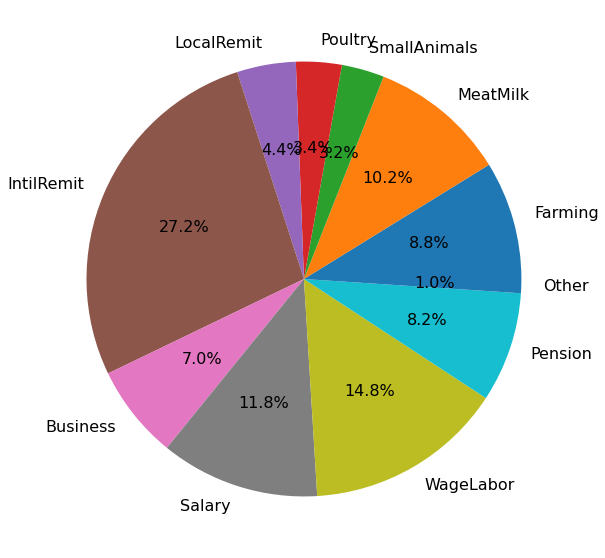

In [23]:
#Creating pie chart of mean income proportions

income_proportions = []

for item in mean_income_prop.columns[1:-1]:
    income_proportions.append(mean_income_prop[item].mean())
    
# Creating plot
fig = plt.figure(figsize =(10, 10))
plt.pie(income_proportions, labels = income_titles, autopct='%1.1f%%', textprops={'fontsize': 16})
 
# show plot
plt.show()

#plt.savefig('IncomePie.png', bbox_inches='tight')

## Income Blocks

In [24]:
#Creating dataframe of simplified income blocks
income_blocks = pd.DataFrame()
income_blocks[['HHID', 'Year', 'Total']] = pivoted_income[['HHID', 'Year', 'Total']]

income_dict = {'Farm': ['Farming'], 'Livestock':['MeatMilk', 'SmallAnimals', 'Poultry'], 'Remittances':['LocalRemit', 'IntilRemit'], 'Off-Farm Labor':['Business', 'Salary', 'WageLabor'], 'Other':['Pension', 'Other']}
income_values = {key : 0 for key in income_dict}

for key in income_dict:
    income_blocks[key] = 0
    for item in income_dict[key]:
        income_blocks[key] += pivoted_income[item]

income_blocks


,HHID,Year,Total,Farm,Livestock,Remittances,Off-Farm Labor,Other
0,2301006,72,385000.0,25000.0,120000.0,0.0,120000.0,120000.0
1,2301007,72,82000.0,0.0,10000.0,0.0,72000.0,0.0
2,2301013,72,22000.0,0.0,22000.0,0.0,0.0,0.0
3,2301016,72,549000.0,0.0,29000.0,0.0,400000.0,120000.0
4,2301017,72,18000.0,18000.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3495,2611114,78,528000.0,16000.0,8000.0,0.0,504000.0,0.0
3496,2611115,78,490000.0,11000.0,107000.0,0.0,300000.0,72000.0
3497,2611117,78,370000.0,40000.0,130000.0,0.0,200000.0,0.0
3498,2611118,78,57000.0,23000.0,0.0,0.0,22000.0,12000.0


In [25]:
#Grouping income streams by hh to calculate average income over 6 years
grouped_incomeblock = income_blocks.groupby('HHID').mean().reset_index()
grouped_incomeblock.drop('Year', axis=1, inplace=True)
grouped_incomeblock

,HHID,Total,Farm,Livestock,Remittances,Off-Farm Labor,Other
0,2301006,4.823714e+05,18285.714286,39571.428571,0.000000e+00,68800.000000,355714.285714
1,2301007,9.185714e+04,0.000000,27714.285714,0.000000e+00,64142.857143,0.000000
2,2301013,2.610000e+05,0.000000,46714.285714,2.142857e+05,0.000000,0.000000
3,2301016,5.781429e+05,0.000000,31571.428571,0.000000e+00,414285.714286,132285.714286
4,2301017,9.100000e+04,26714.285714,0.000000,0.000000e+00,64285.714286,0.000000
...,...,...,...,...,...,...,...
495,2611114,4.635714e+05,12571.428571,6142.857143,1.671429e+05,277714.285714,0.000000
496,2611115,3.352857e+05,12285.714286,43857.142857,5.714286e+04,167142.857143,54857.142857
497,2611117,3.024286e+05,34000.000000,107714.285714,0.000000e+00,160714.285714,0.000000
498,2611118,4.542857e+04,22285.714286,0.000000,0.000000e+00,21428.571429,1714.285714


In [26]:
#Calculating Mean Income Proportions over 6 years
mean_incomeblock_prop = pd.DataFrame()
mean_incomeblock_prop['HHID'] = grouped_incomeblock['HHID']

for col in grouped_incomeblock.columns[1:]:
    mean_incomeblock_prop[col + '_Prop'] = grouped_incomeblock[col] / grouped_incomeblock['Total']
    
mean_incomeblock_prop['Off-Farm Labor_Prop'].describe()

count    500.000000
mean       0.336229
std        0.359957
min        0.000000
25%        0.000000
50%        0.174840
75%        0.691079
max        1.000000
Name: Off-Farm Labor_Prop, dtype: float64

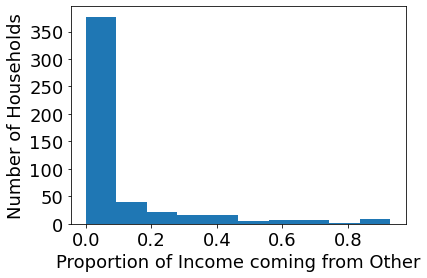

In [27]:
#Histogram of households by contribution of specified category to income

category = 'Other'

x = mean_incomeblock_prop[category + '_Prop']

plt.hist(x, bins=10, density=False, histtype='stepfilled')
plt.xlabel('Proportion of Income coming from ' + category, fontsize=18)
plt.xticks(size=18)
plt.ylabel('Number of Households', fontsize=18)
plt.yticks(size=18)
plt.show()
#plt.savefig(category + '_PropHistogram.png', bbox_inches='tight')

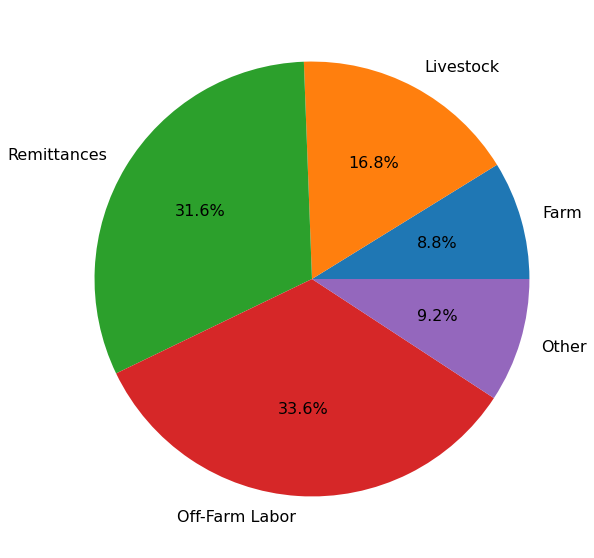

In [28]:
#Creating simplified pie chart of mean income proportions

#income_categories = {'Farm': ['Farming'], 'Livestock':['MeatMilk', 'SmallAnimals', 'Poultry'], 'Remittances':['LocalRemit', 'IntilRemit'], 'Off-Farm Labor':['Business', 'Salary', 'WageLabor'], 'Other':['Pension', 'Other']}
#income_values = {key : 0 for key in income_categories}

income_values = []
for col in mean_incomeblock_prop.columns[2:]:
    income_values.append(mean_incomeblock_prop[col].mean())
        

#Creating plot
fig = plt.figure(figsize =(10, 10))
plt.pie(income_values, labels = income_dict.keys(), autopct='%1.1f%%', textprops={'fontsize': 16})

plt.show()

#plt.savefig('CategoryIncomePie.png', bbox_inches='tight')

# Analyzing Questionnaire Data

In [22]:
raw_questionnaire = pd.read_csv('ClimateChangeData.csv')

raw_questionnaire


,HHID,Resp1_Name,Resp1_Age,Resp1_Gen,Resp2_Name,Resp2_Age,Resp2_Gen,Resp3_Name,Resp3_Age,Resp3_Gen,...,I_2,I_3,I_3_97,I_4,I_4_97,I_5,I_5_97,I_6,I_7,I_8
0,2301006,PII,43,0,0,-1,-1,0,-1,-1,...,3,2,0,1,0,3,0,1,2,2
1,2301007,PII,55,1,0,-1,-1,0,-1,-1,...,1,2,0,1,0,3,0,2,2,2
2,2301013,PII,49,1,0,-1,-1,0,-1,-1,...,1,7,0,1,0,3,0,2,2,2
3,2301016,PII,55,1,0,-1,-1,0,-1,-1,...,2,2,0,1,0,3,0,2,2,3
4,2301017,PII,47,1,0,-1,-1,0,-1,-1,...,1,2,0,1,0,3,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,PII,47,0,PII,44,1,PII,18,1,...,1,1,0,1,0,3,0,2,2,2
496,2611115,PII,36,1,PII,37,0,0,-1,-1,...,1,2,0,1,0,3,0,2,3,3
497,2611117,PII,44,1,0,-1,-1,0,-1,-1,...,2,5,0,1,0,3,0,2,2,2
498,2611118,PII,56,1,0,-1,-1,0,-1,-1,...,1,1,0,1,0,3,0,2,3,2


# Climate Adaptation Strategies (C1)

In [30]:
#Reading in adaptation strategy columns
adaptation = pd.DataFrame()
adaptation['HHID'] = raw_questionnaire['HHID']

for item in raw_questionnaire.columns:
    if 'C1' in item:
        adaptation[item] = raw_questionnaire[item]

adaptation.drop(['C1_0', 'C1_97','C1_98', 'C1_99'], inplace=True, axis=1)

adaptation

,HHID,C1_01,C1_1,C1_2,C1_3,C1_4,C1_5,C1_6,C1_7,C1_8,C1_9,C1_10,C1_11,C1_12,C1_13,C1_97_1
0,2301006,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15
1,2301007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
2,2301013,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1
3,2301016,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15
4,2301017,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1
496,2611115,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
497,2611117,0,1,0,1,0,0,1,0,0,0,0,0,0,0,-1
498,2611118,0,1,0,1,0,0,0,0,0,0,0,0,0,0,-1


In [31]:
#Creating additional strategy columns from 'Others' columns (see calendar)
adaptation['PestControl'] = 0
adaptation['WaterManagement'] = 0

adaptation['PestControl'] = np.where(adaptation['C1_97_1'] == 15, 1, 0)
adaptation['WaterManagement'] = np.where((adaptation['C1_97_1'] > 15) & (adaptation['C1_97_1'] < 18), 1, 0)

adaptstrategies = ['Nothing', 'DifferentSeed', 'DifferentCrop', 'DelayedPlanting', 'FewerCrops', 'BiggerLoan', 'BorrowMoney', 'Remittances', 'SoldLivestock', 'PurchasedLivestock', 'SwitchedSchool', 'DroppedSchool', 'DiversifyLivelihood', 'Migration']

dict1 = {}
for key, value in zip(adaptation.columns[1:-2], adaptstrategies):
    dict1[key] = value

adaptation.rename(columns=dict1, inplace=True)

adaptation.drop(['C1_97_1', 'Nothing', 'DroppedSchool'], inplace=True, axis=1)
adaptation



,HHID,DifferentSeed,DifferentCrop,DelayedPlanting,FewerCrops,BiggerLoan,BorrowMoney,Remittances,SoldLivestock,PurchasedLivestock,SwitchedSchool,DiversifyLivelihood,Migration,PestControl,WaterManagement
0,2301006,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2301007,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2301013,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2301016,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,2301017,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0,0,1,0,0,0,0,0,0,0,0,0,0,0
496,2611115,0,0,0,0,0,0,0,0,0,0,1,0,0,0
497,2611117,1,0,1,0,0,1,0,0,0,0,0,0,0,0
498,2611118,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [32]:
#Adding Adaptation Categories
farm_strategies = ['DifferentSeed', 'DifferentCrop', 'DelayedPlanting', 'PestControl', 'WaterManagement']
financial_strategies = ['BiggerLoan', 'BorrowMoney', 'Remittances']
livelihood_strategies = ['FewerCrops', 'SoldLivestock', 'PurchasedLivestock', 'SwitchedSchool', 'DiversifyLivelihood', 'Migration']

adaptation['FarmStrategies'] = 0
adaptation['FinancialStrategies'] = 0
adaptation['LivelihoodStrategies'] = 0

for i, row in adaptation.iterrows():
    for item in farm_strategies:
        if adaptation[item][i] == 1:
            adaptation['FarmStrategies'][i] = 1
    for item in financial_strategies:
        if adaptation[item][i] == 1:
            adaptation['FinancialStrategies'][i] = 1
    for item in livelihood_strategies:
        if adaptation[item][i] == 1:
            adaptation['LivelihoodStrategies'][i] = 1
    
adaptation['LivelihoodStrategies'].describe() 

count    500.000000
mean       0.172000
std        0.377758
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: LivelihoodStrategies, dtype: float64

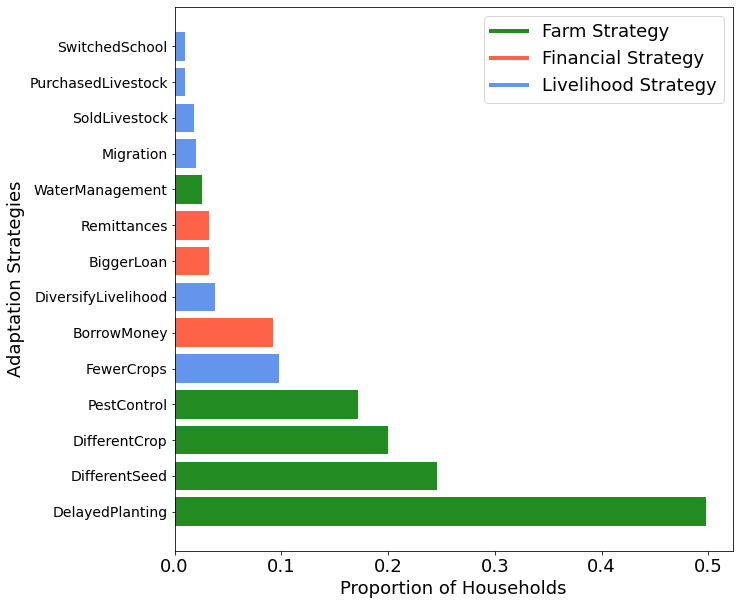

In [33]:
#Creating bar chart of adaptation strategy adoption

column_names = adaptation.columns[1:-3]
strategylength = len(column_names)
x = {key: 0 for key in column_names}
ypos = np.arange(strategylength)

#Defining strategy buckets
labels = {key : [] for key in column_names}
colors = {key : [] for key in column_names}

for col in column_names:
    x[col] = np.count_nonzero(adaptation[col]) / len(adaptation)

#Sort strategies by frequency
x_sort = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
for k in x_sort:
    if ('Planting' in k) or ('Different' in k) or ('Control' in k) or ('Management' in k):
        labels[k] = 'Farm Strategy'
        colors[k] = 'forestgreen'
    elif ('Borrow' in k) or ('Loan' in k) or ('Remittance' in k):
        labels[k] = 'Financial Strategy'
        colors[k] = 'tomato'
    elif ('Fewer' in k) or ('Diversify' in k) or ('Migration' in k) or ('Livestock' in k) or ('School' in k):
        labels[k] = 'Livelihood Strategy'
        colors[k] = 'cornflowerblue'
colors_keys = sorted(colors, key=lambda k: x_sort[k], reverse=True)

colors_sorted = {}
labels_sorted = {}
for k in colors_keys:
    colors_sorted[k] = colors[k]

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='forestgreen', lw=4),
                Line2D([0], [0], color='tomato', lw=4),
                Line2D([0], [0], color='cornflowerblue', lw=4)]


f, ax1 = plt.subplots(figsize=[10,10])
ax1.barh(ypos, x_sort.values(), color = colors_sorted.values(), label=labels_sorted.values())
ax1.set_yticks(ypos, x_sort.keys())
ax1.set_xlabel('Proportion of Households', fontsize=18)
ax1.set_ylabel('Adaptation Strategies', fontsize=18)

plt.yticks(size=14)
plt.xticks(size=18)
plt.legend(custom_lines, ['Farm Strategy', 'Financial Strategy', 'Livelihood Strategy'], fontsize=18)
plt.show()

#plt.savefig('AdaptationStrategyPyramid.png', bbox_inches='tight')

# Climate Risk Perceptions (C2)

In [85]:
perceptions = pd.DataFrame()
perceptions['HHID'] = raw_questionnaire['HHID']

for item in raw_questionnaire.columns:
    if 'C2' in item:
        perceptions[item] = raw_questionnaire[item].astype(float)

risks = ['Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail']


dict2 = {}
for key, value in zip(perceptions.columns[1:], risks):
    dict2[key] = value

perceptions.rename(columns=dict2, inplace=True)
perceptions.replace(98, np.NaN, inplace=True)
perceptions.replace(99, np.NaN, inplace=True)

test = perceptions.iloc[382]
test

HHID           2610091.0
Droughts             NaN
Floods               3.0
Groundwater          3.0
Heat                 3.0
Pests                3.0
Frost                3.0
Hail                 3.0
Name: 382, dtype: float64

In [86]:
#Basic Box Plot of Climate Perceptions
std_perceptions = perceptions
#Standardizing so that "no change" shows up as 0
for col in perceptions.columns[1:]:
    std_perceptions[col] = perceptions[col] - 2




In [87]:
ind_perceptions = std_perceptions[['HHID', 'Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail']]

ind_perceptions.to_csv('IndividualHazardPerceptions.csv')

ind_perceptions

,HHID,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail
0,2301006,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0
1,2301007,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0
2,2301013,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0
3,2301016,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2301017,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
495,2611114,1.0,0.0,-1.0,1.0,0.0,1.0,1.0
496,2611115,1.0,1.0,-1.0,1.0,1.0,1.0,1.0
497,2611117,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0
498,2611118,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/1434473973.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail'], size=18, rotation=45)


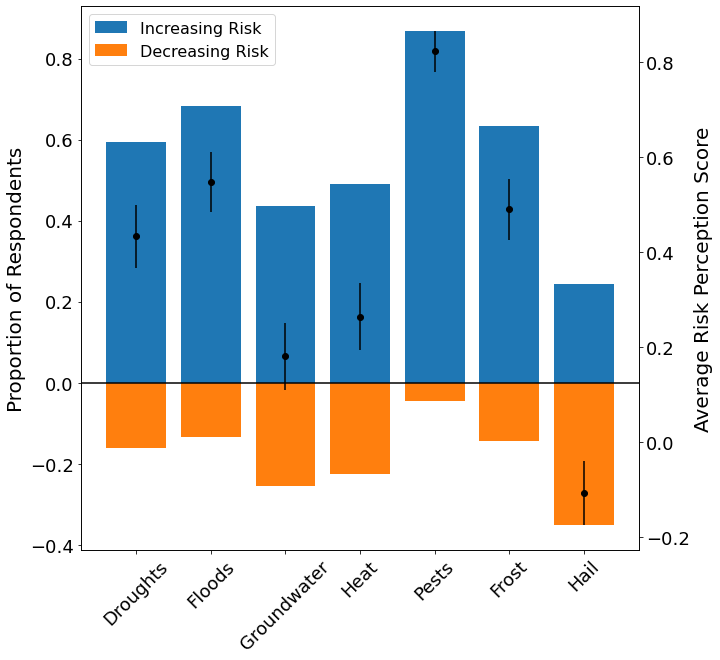

In [25]:
risk_types = len(risks)
respondents = len(std_perceptions)

higher = np.zeros(risk_types)
lower = np.zeros(risk_types)
mean = np.zeros(risk_types)
xpos = np.zeros(risk_types)
error = np.zeros(risk_types)

data = []

f, ax1 = plt.subplots(figsize=(10,10)) 

for i, name in enumerate(std_perceptions.columns[1:]):
    data.append(std_perceptions[name])
    xpos[i] = i
    higher[i] = len(std_perceptions[std_perceptions[name] == 1.0]) / respondents
    lower[i] = len(std_perceptions[std_perceptions[name] == -1.0]) / respondents
    mean[i] = std_perceptions[name].mean()
    error[i] = confint(std_perceptions[name])



ax1.bar(xpos, higher, label = 'Increasing Risk')
ax1.bar(xpos, -lower, label = 'Decreasing Risk')

ax1.set_xticklabels(['','Droughts', 'Floods', 'Groundwater', 'Heat', 'Pests', 'Frost', 'Hail'], size=18, rotation=45)

plt.ylabel('Proportion of Respondents', size=20)
plt.yticks(size=18)
plt.axhline(y=0, color='black')
plt.legend(fontsize=16)

ax2 = ax1.twinx()

ax2.scatter(xpos, mean, color='black')
ax2.errorbar(xpos, mean, yerr=error, color='black', fmt='none')
ax2.set_ylabel('Average Risk Perception Score', size=20)

plt.yticks(size=18)
plt.xticks(size=18, rotation=45)

plt.show()
#plt.savefig('RiskPerception_Summary.png', bbox_inches='tight')

In [98]:
#Creating Total Perceptions Measure
std_perceptions['Total'] = std_perceptions['Droughts'] + std_perceptions['Floods'] + std_perceptions['Heat'] + std_perceptions['Pests'] + std_perceptions['Frost'] + std_perceptions['Hail']

std_perceptions['Total'].describe()
max_value = std_perceptions['Total'].max()
std_perceptions['TotalNorm'] = std_perceptions['Total'] / max_value
std_perceptions

discrete_perceptions = std_perceptions.iloc[:,1:-3]
discrete_perceptions['Min'] = discrete_perceptions.min(axis=1)
discrete_perceptions['Max'] = discrete_perceptions.max(axis=1)

np.count_nonzero((discrete_perceptions['Min'] == -1.0) & (discrete_perceptions['Max'] == 1.0)) / 500



0.552

In [99]:
std_perceptions['Quart'] = 0

for h in range(len(std_perceptions)):
    if std_perceptions['Total'][h] <= 0:
        std_perceptions['Quart'][h] = 1
    elif std_perceptions['Total'][h] <= 2:
        std_perceptions['Quart'][h] = 2
    elif std_perceptions['Total'][h] <= 4:
        std_perceptions['Quart'][h] = 3
    else:
        std_perceptions['Quart'][h] = 4

std_perceptions

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/2405325438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_perceptions['Quart'][h] = 2
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/2405325438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_perceptions['Quart'][h] = 1
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/2405325438.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,HHID,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail,Total,TotalNorm,Quart
0,2301006,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.166667,2
1,2301007,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1
2,2301013,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0,0.0,0.000000,1
3,2301016,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.500000,3
4,2301017,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,2.0,0.333333,2
...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,0.0,-1.0,1.0,0.0,1.0,1.0,4.0,0.666667,3
496,2611115,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,6.0,1.000000,4
497,2611117,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-0.166667,1
498,2611118,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,2.0,0.333333,2


In [30]:
#Merging with Migration Data

#Import Data
raw_data = pd.read_csv('ClimateChangeCalendar.csv')

raw_data.replace(' ',0, inplace=True)


#This creates a new dataframe to store only the data that we want
migration = pd.DataFrame()
migration['HHID'] = raw_data['HHID']

target_columns = ['C12_', 'C13_']

#This loops over each column name in the raw_cvfs dataframe. If the column name matches one of the variables we want, then we store it in the clean_cvfs dataframe
for item in raw_data.columns:
    
    #For example, here I am saying that any variable that contains 'B11A' should be stored in our dataframe. This includes all the separate 'B11A' variables for each year.
    for col in target_columns:
        if col in item:
        
            migration[item] = raw_data[item].astype(float)

local = []
intl = []
for col in migration.columns:
    if 'C12' in col:
        local.append(col)
    elif 'C13' in col:
        intl.append(col)
        
migration['Local'] = migration[local].sum(axis=1)
migration['Intl'] = migration[intl].sum(axis=1)

for i in range(len(migration)):
    if migration['Local'][i] > 0:
        migration['Local'][i] = 1
    if migration['Intl'][i] > 0:
        migration['Intl'][i] = 1
        
migration

short_migration = migration[['HHID', 'Local', 'Intl']]

short_migration


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/1369044100.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration['Intl'][i] = 1
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/1369044100.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration['Local'][i] = 1


,HHID,Local,Intl
0,2301006,0.0,0.0
1,2301007,0.0,0.0
2,2301013,0.0,1.0
3,2301016,1.0,0.0
4,2301017,0.0,0.0
...,...,...,...
495,2611114,0.0,1.0
496,2611115,0.0,1.0
497,2611117,0.0,0.0
498,2611118,0.0,0.0


In [31]:
mig_climrisk = pd.merge(std_perceptions, short_migration, on='HHID')

mig_climrisk

,HHID,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail,Total,TotalNorm,Quart,Local,Intl
0,2301006,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.166667,2,0.0,0.0
1,2301007,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1,0.0,0.0
2,2301013,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0,0.0,0.000000,1,0.0,1.0
3,2301016,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.500000,3,1.0,0.0
4,2301017,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,2.0,0.333333,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,0.0,-1.0,1.0,0.0,1.0,1.0,4.0,0.666667,3,0.0,1.0
496,2611115,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,6.0,1.000000,4,0.0,1.0
497,2611117,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-0.166667,1,0.0,0.0
498,2611118,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,2.0,0.333333,2,0.0,0.0


[1. 2. 3. 4.]


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/564127864.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['','','1','','2', '','3', '','4'], size=18)


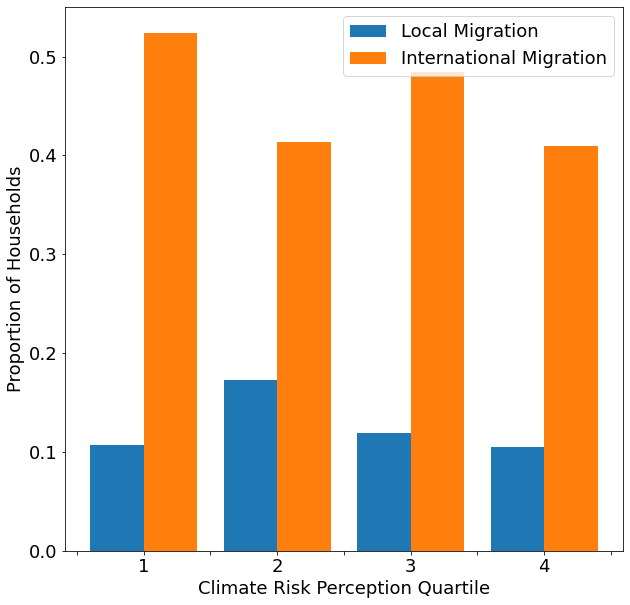

In [32]:
#Bar Plot - Risk Quartile and Migration

quart_local = np.zeros(4)
quart_intl = np.zeros(4)

for i in range(len(quart_local)):
    quart_local[i] = mig_climrisk.loc[mig_climrisk['Quart'] == (i+1)]['Local'].mean()
    quart_intl[i] = mig_climrisk.loc[mig_climrisk['Quart'] == (i+1)]['Intl'].mean()

x = np.linspace(1,4,4)
print(x)
y1 = quart_local
y2 = quart_intl

f, ax1 = plt.subplots(figsize=[10,10])
ax1.bar(x-0.2, y1, width=0.4, label='Local Migration')
ax1.bar(x+0.2, y2, width=0.4, label='International Migration')

ax1.set_ylabel('Proportion of Households', size=18)
ax1.set_xlabel('Climate Risk Perception Quartile', size=18)
ax1.set_xticklabels(['','','1','','2', '','3', '','4'], size=18)
ax1.set_ylim([0,0.55])
plt.yticks(size=18)
plt.legend(fontsize=18)
plt.show()

#plt.savefig('Migration_RiskQuartile.png', bbox_inches='tight')

# Summary Statistics: Salience of Risks (B4)

In [89]:
raw_questionnaire = pd.read_csv('ClimateChangeData.csv')

salience = pd.DataFrame()
salience['HHID'] = raw_questionnaire['HHID']

for item in raw_questionnaire.columns:
    if 'B4' in item:
        salience[item] = raw_questionnaire[item].astype(float)

salience

,HHID,B4_1,B4_2,B4_3,B4_4,B4_5,B4_6,B4_7,B4_8,B4_9,B4_10,B4_11,B4_12,B4_13,B4_14,B4_15,B4_97,B4_97_1,B4_97_1_1
0,2301006,1.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,0.0,-1.0,-1.0
1,2301007,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,-1.0,-1.0
2,2301013,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,0.0,-1.0,-1.0
3,2301016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,-1.0,-1.0
4,2301017,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,0.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,0.0,-1.0,-1.0
496,2611115,1.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,0.0,-1.0,-1.0
497,2611117,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,0.0,-1.0,-1.0
498,2611118,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,0.0,-1.0,-1.0


In [90]:
#Converting column heads to descriptive names

factors = ['Labour', 'Health', 'Technology', 'Finance', 'Education', 'Seeds', 'Soil', 'Water', 'Land', 'ShortWeather', 'LongWeather', 'Pests', 'Markets', 'Economy', 'Religious']

factor_dict = {}
for key, value in zip(salience.columns[1:-3], factors):
    factor_dict[key] = value

    
salience.rename(columns=factor_dict, inplace=True)

clean_salience = salience.iloc[:, :-3]

clean_salience



,HHID,Labour,Health,Technology,Finance,Education,Seeds,Soil,Water,Land,ShortWeather,LongWeather,Pests,Markets,Economy,Religious
0,2301006,1.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0
1,2301007,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0
2,2301013,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0
3,2301016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0
4,2301017,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0
496,2611115,1.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0
497,2611117,3.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0
498,2611118,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0


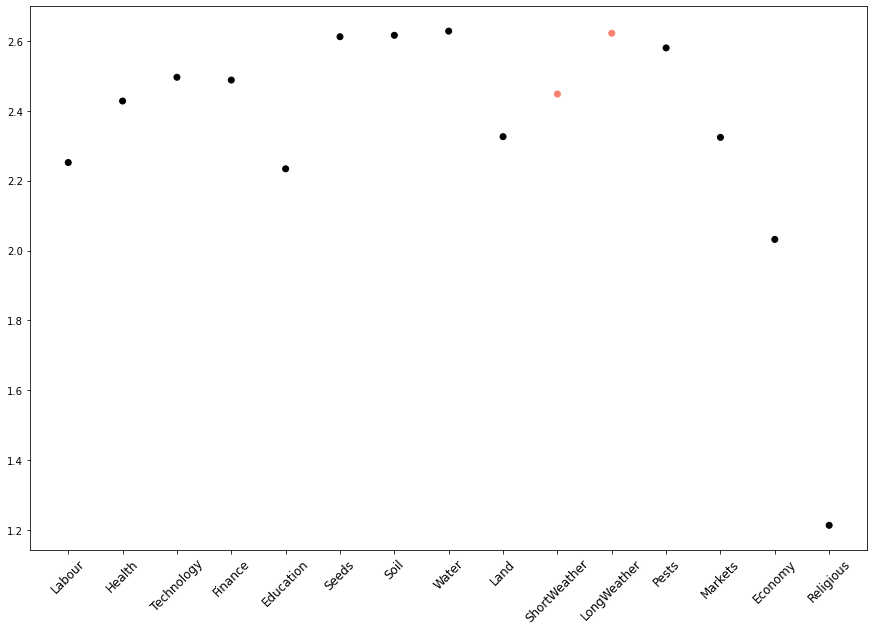

In [91]:
# Confidence Interval Plot

num_factors = len(factors)
means = np.zeros(num_factors)
error = np.zeros(num_factors)
xpos = np.arange(0, num_factors, 1)
color_label = []
for f, element in enumerate(factors):
    means[f] = clean_salience[element].mean()
    error[f] = confint(clean_salience[element])
    if 'Weather' in element:
        color_label.append('salmon')
    else:
        color_label.append('black')


f, ax = plt.subplots(figsize=[15,10])
ax.scatter(xpos, means, color=color_label)
#ax.errorbar(xpos, means, yerr=error, color=color_label, fmt='none')
ax.set_xticks(xpos)
ax.set_xticklabels(['Labour', 'Health', 'Technology', 'Finance', 'Education', 'Seeds', 'Soil', 'Water', 'Land', 'ShortWeather', 'LongWeather', 'Pests', 'Markets', 'Economy', 'Religious'], size=12, rotation=45)

plt.show()


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/1449098180.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Low', 'Medium', 'High'], size=18)


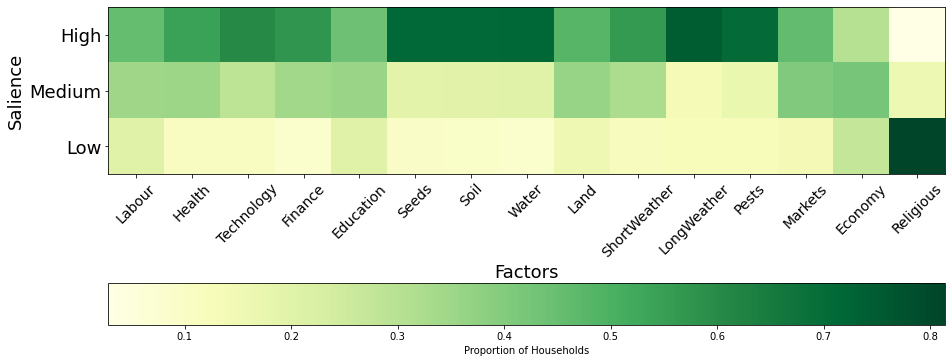

In [92]:
#Heat Map Plot

high = np.zeros(num_factors)
medium = np.zeros(num_factors)
low = np.zeros(num_factors)
xpos = np.arange(0, num_factors, 1)

for f, element in enumerate(factors):
    total_responses = np.count_nonzero(clean_salience[element] > 0)
    high[f] = np.count_nonzero(clean_salience[element] == 3) / total_responses
    medium[f] = np.count_nonzero(clean_salience[element] == 2) / total_responses
    low[f] = np.count_nonzero(clean_salience[element] == 1) / total_responses
    
z = [low, medium, high]
output = np.asarray(z)

f, ax1 = plt.subplots(figsize=[15,10])
ax1.set_xticks(xpos)
ax1.set_xticklabels(['Labour', 'Health', 'Technology', 'Finance', 'Education', 'Seeds', 'Soil', 'Water', 'Land', 'ShortWeather', 'LongWeather', 'Pests', 'Markets', 'Economy', 'Religious'], size=14, rotation=45)
ax1.set_xlabel('Factors', fontsize=18)

ax1.set_ylabel('Salience', fontsize=18)
ax1.set_yticklabels(['Low', 'Medium', 'High'], size=18)
plt.yticks(np.arange(0, 3, 1.0))

plot = ax1.imshow(z, interpolation='none', cmap='YlGn', origin='lower')
f.colorbar(plot,ax=ax1, pad=0.2, orientation='horizontal', label='Proportion of Households')

plt.show()

#plt.savefig('Salience.png', bbox_inches='tight')


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/1992889349.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['Low', 'Medium', 'High'], size=18)


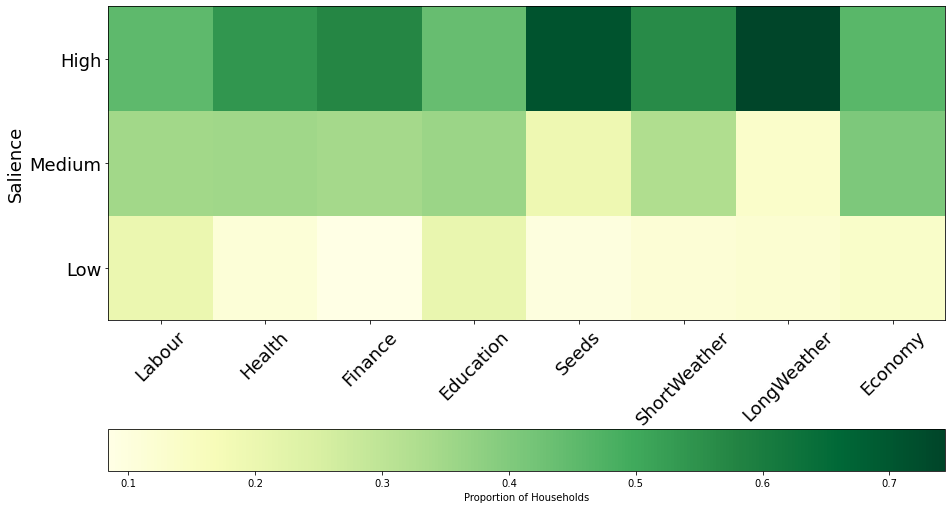

In [93]:
#Shortened Version

key_factors = [0,1,3,4,5,9, 10,12]

short_high = np.zeros(len(key_factors))
short_med = np.zeros(len(key_factors))
short_low = np.zeros(len(key_factors))
i = 0
for f, element in enumerate(factors):
    if f in key_factors:
        short_high[i]= np.count_nonzero(clean_salience[element] == 3) / total_responses
        short_med[i] = np.count_nonzero(clean_salience[element] == 2) / total_responses
        short_low[i] = np.count_nonzero(clean_salience[element] == 1) / total_responses
        i += 1


z = [short_low, short_med, short_high]
output = np.asarray(z)
x_short = np.arange(0, len(key_factors), 1)
f, ax1 = plt.subplots(figsize=[15,10])
ax1.set_xticks(x_short)
ax1.set_xticklabels(['Labour', 'Health', 'Finance', 'Education', 'Seeds', 'ShortWeather','LongWeather','Economy'], size=18, rotation=45)
ax1.set_xlabel('Factors', fontsize=18)

ax1.set_ylabel('Salience', fontsize=18)
ax1.set_yticklabels(['Low', 'Medium', 'High'], size=18)
plt.yticks(np.arange(0, 3, 1.0))

plot = ax1.imshow(z, interpolation='none', cmap='YlGn', origin='lower')
f.colorbar(plot,ax=ax1, pad=0.2, orientation='horizontal', label='Proportion of Households')

plt.show()

#plt.savefig('Short_Salience.png', bbox_inches='tight')

In [94]:
#Constructing Salience Index

background_salience = clean_salience.loc[ : , clean_salience.columns != 'LongWeather']

background_salience['Mean'] = background_salience.loc[: , background_salience.columns != 'HHID'].mean(axis=1)
clean_salience['Mean'] = background_salience['Mean']
clean_salience['Net_Salience'] = clean_salience['LongWeather'] - clean_salience['Mean']
clean_salience['Net_Salience'].describe()

clean_salience['Translate_Salience'] = clean_salience['Net_Salience'] + 2
max_value = clean_salience['Translate_Salience'].max()
clean_salience['SalienceIndex'] = clean_salience['Translate_Salience'] / max_value

clean_salience['LongWeather'].describe()

count    500.000000
mean       2.622000
std        0.692875
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: LongWeather, dtype: float64

<AxesSubplot:>

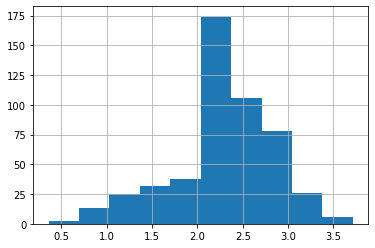

In [95]:
clean_salience['Translate_Salience'].hist()


In [97]:
std_perceptions

,HHID,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail
0,2301006,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0
1,2301007,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0
2,2301013,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0
3,2301016,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2301017,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
495,2611114,1.0,0.0,-1.0,1.0,0.0,1.0,1.0
496,2611115,1.0,1.0,-1.0,1.0,1.0,1.0,1.0
497,2611117,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0
498,2611118,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0


In [100]:
#Constructing composite risk perceptions index

clean_salience[['Risk_Norm', 'Quart']] = std_perceptions[['TotalNorm', 'Quart']]
clean_salience['CompositeRisk'] = clean_salience['SalienceIndex'] * clean_salience['Risk_Norm']
final_salience = clean_salience[['HHID', 'SalienceIndex', 'Risk_Norm', 'CompositeRisk']]
final_salience.to_csv('ClimateRiskPerceptions.csv')

final_salience


,HHID,SalienceIndex,Risk_Norm,CompositeRisk
0,2301006,0.673077,0.166667,0.112179
1,2301007,0.461538,0.000000,0.000000
2,2301013,0.615385,0.000000,0.000000
3,2301016,1.000000,0.500000,0.500000
4,2301017,0.692308,0.333333,0.230769
...,...,...,...,...
495,2611114,0.615385,0.666667,0.410256
496,2611115,0.653846,1.000000,0.653846
497,2611117,0.480769,-0.166667,-0.080128
498,2611118,0.634615,0.333333,0.211538


In [ ]:
risk_perceptions = pd.merge(std_perceptions, )

# Information Sources and Social Networks

In [43]:
raw_questionnaire = pd.read_csv('ClimateChangeData.csv')

sources = pd.DataFrame()
sources['HHID'] = raw_questionnaire['HHID']

for item in raw_questionnaire.columns:
    if ('F1_' in item or 'F2_' in item) and '97' not in item:
        sources[item] = raw_questionnaire[item].astype(float)
sources.replace(95, np.NaN, inplace=True)
sources.replace(98, np.NaN, inplace=True)
sources.replace(99, np.NaN, inplace=True)
sources.replace(-1, np.NaN, inplace=True)

sourcenames = ['Radio', 'Television', 'Newspapers', 'AgExtension', 'Veterinarian', 'MigrantLabor', 'OtherGov', 'LocalFriend', 'DistantFriend', 'Religious', 'Scientist', 'SocialMedia']

source1_dict = {}
source2_dict = {}
for key, value in zip(sources.columns[1:13], sourcenames):
    source1_dict[key] = value
    
for key, value in zip(sources.columns[13:], sourcenames):
    source2_dict[key] = value + 'Trust'
    
sources.rename(columns=source1_dict, inplace=True)
sources.rename(columns=source2_dict, inplace=True)
percep_df = std_perceptions[['HHID', 'Total']]

bubble_df = pd.merge(sources, percep_df, on='HHID')

bubble_df['ScientistTrust'].describe()

sources

,HHID,Radio,Television,Newspapers,AgExtension,Veterinarian,MigrantLabor,OtherGov,LocalFriend,DistantFriend,...,NewspapersTrust,AgExtensionTrust,VeterinarianTrust,MigrantLaborTrust,OtherGovTrust,LocalFriendTrust,DistantFriendTrust,ReligiousTrust,ScientistTrust,SocialMediaTrust
0,2301006,4.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,1.0
1,2301007,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2301013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,2301016,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,2301017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0
496,2611115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
497,2611117,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN
498,2611118,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,...,NaN,NaN,2.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN


In [44]:
#Plot Source Frequency and Trust

x = np.zeros(len(sourcenames))
for i, key in enumerate(bubble_df.columns[1:13]):
    x[i] = bubble_df.loc[bubble_df[key] > 0][key].mean()

y = np.zeros(len(sourcenames))
for j, key in enumerate(bubble_df.columns[13:-1]):
    y[j] = bubble_df[key].mean()

s = np.zeros(len(sourcenames))
for k, key in enumerate(bubble_df.columns[1:13]):
    s[k] = np.count_nonzero(bubble_df[key]) / 500
print(s)
max_size = np.max(s)
s_std = np.zeros(len(sourcenames))
for k, key in enumerate(bubble_df.columns[1:13]):
    s_std[k] = s[k] / max_size * 100

risk = np.zeros(len(sourcenames))
for l, key in enumerate(bubble_df.columns[1:13]):
    risk[l] = bubble_df.loc[sources[key] > 1]['Total'].mean()

print(risk)

plot_df = pd.DataFrame()
plot_df['Source'] = sourcenames
plot_df['Frequency'] = x
plot_df['Trust'] = y
plot_df['Proportion'] = s * 500
plot_df['Risk Perception'] = risk

plot_df


[0.402 0.476 0.146 0.226 0.192 0.13  0.136 0.912 0.632 0.066 0.028 0.586]
[2.29310345 2.44966443 2.48571429 2.12195122 1.41666667 2.16666667
 1.79166667 2.55154639 2.55021834 1.23076923 3.         2.38461538]


,Source,Frequency,Trust,Proportion,Risk Perception
0,Radio,2.179104,2.373134,201.0,2.293103
1,Television,2.172269,2.378151,238.0,2.449664
2,Newspapers,1.863014,2.397260,73.0,2.485714
3,AgExtension,1.460177,2.433628,113.0,2.121951
4,Veterinarian,1.291667,2.447917,96.0,1.416667
5,MigrantLabor,1.523077,1.907692,65.0,2.166667
6,OtherGov,1.426471,2.338235,68.0,1.791667
7,LocalFriend,2.725275,2.402198,456.0,2.551546
8,DistantFriend,2.231013,2.367089,316.0,2.550218
9,Religious,1.636364,2.272727,33.0,1.230769


In [37]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)


import plotly.express as px
df = plot_df

fig = px.scatter(df, x="Frequency", y="Trust",
	         size="Proportion", color="Risk Perception",
                 hover_name="Source", size_max=75)
fig.show()



In [50]:
#Creating Dummy Variables for Sources consulted at least monthly

narrow_sources = pd.DataFrame()

narrow_sources['HHID'] = sources['HHID']
        

sourcenames = ['Radio', 'Television', 'Newspapers', 'AgExtension', 'Veterinarian', 'MigrantLabor', 'OtherGov', 'LocalFriend', 'DistantFriend', 'Religious', 'Scientist', 'SocialMedia']

for item in sources.columns:
    if item in sourcenames:
        narrow_sources[item] = sources[item].astype(float)
        
source_dict = {}
for key, value in zip(narrow_sources.columns[1:13], sourcenames):
    source_dict[key] = value
    
narrow_sources.rename(columns=source_dict, inplace=True)

#Creating Total Source Index
narrow_sources['SourceNumber'] = narrow_sources.gt(0).sum(axis=1) - 1 #Accounting for HHID, which will be greater than 1
mean_value = narrow_sources['SourceNumber'].mean()
std_value = np.std(narrow_sources['SourceNumber'])
narrow_sources['SourceIndex'] = (narrow_sources['SourceNumber'] - mean_value) / std_value


narrow_sources['PublicSources'] = np.where((narrow_sources['AgExtension'] > 0) | (narrow_sources['OtherGov'] > 0) ,1,0)

narrow_sources.to_csv('Information.csv')

narrow_sources


,HHID,Radio,Television,Newspapers,AgExtension,Veterinarian,MigrantLabor,OtherGov,LocalFriend,DistantFriend,Religious,Scientist,SocialMedia,SourceNumber,SourceIndex,PublicSources
0,2301006,4.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,5,0.493287,0
1,2301007,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,0.0,0.0,0.0,1,-1.350776,0
2,2301013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1,-1.350776,0
3,2301016,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2,-0.889760,0
4,2301017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,3,-0.428744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,3.0,5,0.493287,0
496,2611115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1,-1.350776,0
497,2611117,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3,-0.428744,0
498,2611118,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3,-0.428744,0


In [49]:
monthly_sources = narrow_sources.drop(narrow_sources.columns[13:], axis=1)
for col in monthly_sources.columns[1:13]:
    monthly_sources[col] = np.where(narrow_sources[col] > 1, 1,0)

monthly_sources

,HHID,Radio,Television,Newspapers,AgExtension,Veterinarian,MigrantLabor,OtherGov,LocalFriend,DistantFriend,Religious,Scientist,SocialMedia
0,2301006,1,1,0,0,0,0,0,1,0,0,0,1
1,2301007,0,0,0,0,0,1,0,0,0,0,0,0
2,2301013,0,0,0,0,0,0,0,1,0,0,0,0
3,2301016,0,1,0,0,0,0,0,1,0,0,0,0
4,2301017,0,0,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1,1,0,0,0,0,0,1,1,0,0,1
496,2611115,0,0,0,0,0,0,0,1,0,0,0,0
497,2611117,0,0,0,0,0,0,0,0,1,0,0,0
498,2611118,0,0,0,0,1,0,0,1,1,0,0,0


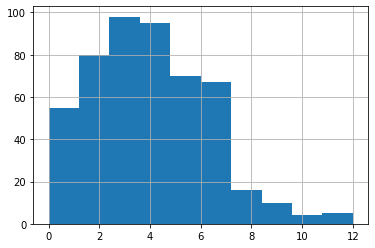

8.0


In [65]:

narrow_sources['SourceNumber'].hist()
plt.show()

print(np.percentile(narrow_sources['SourceNumber'], 95))

In [54]:
#Creating Groups Index

groups = pd.DataFrame()

groups['HHID'] = raw_questionnaire['HHID']

for item in raw_questionnaire.columns:
    if 'G1_' in item:
        groups[item] = raw_questionnaire[item].astype(float)

narrow_groups = pd.DataFrame()
for col in groups.columns[0:8]:
    narrow_groups[col] = groups[col]

groupnames = ["Women", "Youth", "FarmCoop", "Livestock", "Migrants", "CFUG", "Lending"]

group_dict = {}
for key, value in zip(narrow_groups.columns[1:8], groupnames):
    group_dict[key] = value
    
narrow_groups.rename(columns=group_dict, inplace=True)

dummy_groups = pd.DataFrame()
dummy_groups['HHID'] = narrow_groups['HHID']

for col in narrow_groups.columns[1:8]:
    dummy_groups[col] = narrow_groups[col]
    for i in range(len(narrow_groups)):
        if narrow_groups[col][i] > 11 and narrow_groups[col][i] < 90:
            dummy_groups[col][i] = 1
        else:
            dummy_groups[col][i] = 0

dummy_groups['GroupNumber'] = dummy_groups.gt(0).sum(axis=1) - 1 #Accounting for HHID, which will be greater than 1

mean_value = np.mean(dummy_groups['GroupNumber'])
std_value = np.std(dummy_groups['GroupNumber'])
dummy_groups['GroupIndex'] = (dummy_groups['GroupNumber'] - mean_value) / std_value
dummy_groups.to_csv('SocialNetworks.csv')
dummy_groups



/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/1030524359.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_groups[col][i] = 1
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/1030524359.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_groups[col][i] = 0
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/1030524359.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  du

,HHID,Women,Youth,FarmCoop,Livestock,Migrants,CFUG,Lending,GroupNumber,GroupIndex
0,2301006,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3,1.552558
1,2301007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.608180
2,2301013,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,-0.336199
3,2301016,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3,1.552558
4,2301017,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.608180
...,...,...,...,...,...,...,...,...,...,...
495,2611114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.280577
496,2611115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.280577
497,2611117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.336199
498,2611118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.280577


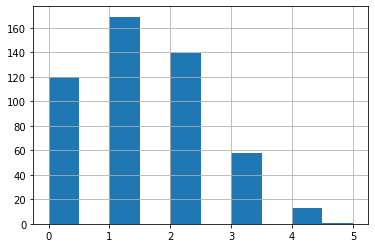

3.0


In [52]:
dummy_groups['GroupNumber'].hist()
plt.show()

print(np.percentile(dummy_groups['GroupNumber'], 95))

In [53]:
group_df = pd.merge(narrow_groups, percep_df, on='HHID')

group_df['GroupNumber'] = dummy_groups['GroupNumber']

for col in group_df.columns[1:8]:
    for i in range(len(narrow_groups)):
        if group_df[col][i] > 94:
            group_df[col][i] = 0
group_df.dropna()



/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/2915194055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df[col][i] = 0


,HHID,Women,Youth,FarmCoop,Livestock,Migrants,CFUG,Lending,Total,GroupNumber
0,2301006,12.0,12.0,0.0,0.0,0.0,12.0,0.0,1.0,3
1,2301007,12.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,2
2,2301013,0.0,2.0,0.0,0.0,0.0,12.0,1.0,0.0,1
3,2301016,12.0,0.0,0.0,0.0,0.0,12.0,12.0,3.0,3
4,2301017,12.0,0.0,12.0,0.0,0.0,1.0,0.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...
495,2611114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0
496,2611115,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,0
497,2611117,12.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1
498,2611118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0


In [56]:
#Plot Group Frequency and Risk Perceptions



x = np.zeros(len(groupnames))
for i, key in enumerate(group_df.columns[1:8]):
    x[i] = group_df.loc[group_df[key] > 0][key].mean()

y = np.zeros(len(groupnames))
for j, key in enumerate(group_df.columns[1:8]):
    y[j] = np.average(group_df.loc[group_df[key] > 0]['GroupNumber']) - 1

s = np.zeros(len(groupnames))
for k, key in enumerate(group_df.columns[1:8]):
    s[k] = np.count_nonzero(group_df[key]) / 499
print(s)
max_size = np.max(s)
s_std = np.zeros(len(groupnames))
for k, key in enumerate(group_df.columns[1:8]):
    s_std[k] = s[k] / max_size * 100

risk = np.zeros(len(groupnames))
for l, key in enumerate(group_df.columns[1:8]):
    risk[l] = group_df.loc[group_df[key] > 1]['Total'].mean()

print(risk)

plot_df = pd.DataFrame()
plot_df['Group'] = groupnames
plot_df['Frequency (Meetings/yr)'] = x
plot_df['Avg Number of Other Groups'] = y
plot_df['Proportion'] = s * 500
plot_df['Risk Perception'] = risk

plot_df.dropna(inplace=True)

plot_df

[0.75751503 0.1503006  0.45290581 0.10821643 0.00200401 0.44488978
 0.29258517]
[2.38586957 2.20833333 2.63874346 2.25              nan 2.46327684
 2.40186916]


,Group,Frequency (Meetings/yr),Avg Number of Other Groups,Proportion,Risk Perception
0,Women,12.645503,0.666667,378.757515,2.385870
1,Youth,8.640000,1.146667,75.150301,2.208333
2,FarmCoop,8.575221,0.858407,226.452906,2.638743
3,Livestock,4.518519,0.925926,54.108216,2.250000
5,CFUG,6.626126,0.720721,222.444890,2.463277
6,Lending,7.369863,0.780822,146.292585,2.401869


In [48]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)


import plotly.express as px
df = plot_df

fig = px.scatter(df, x="Frequency (Meetings/yr)", y="Avg Number of Other Groups",
	         size="Proportion", color="Risk Perception",
                 hover_name="Group", size_max=75)

fig.show()


# Basic Respondent Info

In [55]:
house_info = pd.DataFrame()

raw_questionnaire = pd.read_csv('ClimateChangeData.csv')
house_info = raw_questionnaire[['HHID', 'H1', 'H2']]

census_data = pd.read_csv('CensusData.csv')

census_data


,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,Address,WhenMove,BirthPlace,MoveHereYear,Caste
0,2301006,0:10,4,10,1,0,3,PII,4,0,0,-1,0,-1,1
1,2301006,0:10,2,40,1,1,9,0,5,0,0,-1,N56,2069-02,1
2,2301006,0:10,1,43,0,1,9,0,2,1,0,-1,0,-1,1
3,2301006,0:10,3,17,0,0,10,PII,4,0,0,-1,0,-1,1
4,2301007,0:10,1,55,1,1,3,0,5,1,0,-1,N67,2059-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,2611119,0:24,4,36,1,1,12,0,2,1,N01,2062-07,N85,2064-08,3
2385,2611119,0:24,3,41,0,1,16,0,2,1,N01,2057-12,0,-1,3
2386,2611119,0:24,7,34,0,1,16,0,2,0,N12,2071-01,0,-1,3
2387,2611119,0:24,6,4,0,0,NS,PII,4,0,N01,2075-05,0,-1,3


In [56]:
#Isolating respondent info
respondent_info = census_data.loc[census_data['SN'] == 1]

respondent_info

,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,Address,WhenMove,BirthPlace,MoveHereYear,Caste
2,2301006,0:10,1,43,0,1,9,0,2,1,0,-1,0,-1,1
4,2301007,0:10,1,55,1,1,3,0,5,1,0,-1,N67,2059-01,1
9,2301013,0:06,1,49,1,1,0,0,6,0,0,-1,0,-1,3
11,2301016,0:15,1,55,1,1,0,0,5,0,0,-1,0,-1,1
22,2301017,0:05,1,47,1,1,10,0,5,0,0,-1,N56,2049-06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,2611114,0:11,1,47,0,1,0,0,3,1,0,-1,N56,2074-03,6
2367,2611115,0:10,1,36,1,1,5,0,5,1,0,-1,0,-1,6
2372,2611117,0:09,1,44,1,1,0,0,5,1,0,-1,F091,2052,3
2376,2611118,0:04,1,56,1,1,0,0,5,1,0,-1,N56,2041-01,3


In [59]:
#Creating categorical variables for some secondary school attainment and caste types
respondent_info['Secondary'] = np.where(respondent_info['Class'].astype(float) > 5,1,0)

castes = ['Brahmin-Chetri', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other']

for i, c in enumerate(castes):
    respondent_info[c] = np.where(respondent_info['Caste'] == (i+1), 1,0)
    
respondent_info.to_csv('Demographics.csv')
respondent_info

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/741544511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondent_info['Secondary'] = np.where(respondent_info['Class'].astype(float) > 5,1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/741544511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondent_info[c] = np.where(respondent_info['Caste'] == (i+1), 1,0)


,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,...,BirthPlace,MoveHereYear,Caste,Secondary,Brahmin-Chetri,Gurung-Magar-Tamang,Dalit,Newar,Tharu-Darai-Kumal,Other
2,2301006,0:10,1,43,0,1,9,0,2,1,...,0,-1,1,1,1,0,0,0,0,0
4,2301007,0:10,1,55,1,1,3,0,5,1,...,N67,2059-01,1,0,1,0,0,0,0,0
9,2301013,0:06,1,49,1,1,0,0,6,0,...,0,-1,3,0,0,0,1,0,0,0
11,2301016,0:15,1,55,1,1,0,0,5,0,...,0,-1,1,0,1,0,0,0,0,0
22,2301017,0:05,1,47,1,1,10,0,5,0,...,N56,2049-06,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360,2611114,0:11,1,47,0,1,0,0,3,1,...,N56,2074-03,6,0,0,0,0,0,0,1
2367,2611115,0:10,1,36,1,1,5,0,5,1,...,0,-1,6,0,0,0,0,0,0,1
2372,2611117,0:09,1,44,1,1,0,0,5,1,...,F091,2052,3,0,0,0,1,0,0,0
2376,2611118,0:04,1,56,1,1,0,0,5,1,...,N56,2041-01,3,0,0,0,1,0,0,0


In [57]:
exchange_rate = 1 / 125 #Approximate exchange rate in May 2022, during time of data collection
house_info['Log_Income'] = np.log(house_info['H2'])
np.count_nonzero(house_info['H2'] >= 1000000) / 500

/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_14771/1836282376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_info['Log_Income'] = np.log(house_info['H2'])


0.032

# Climate Data

In [117]:
spei_data = pd.DataFrame()

spei_data = pd.read_csv('Data/SPEI_27.75_84.25.csv')

spei03 = spei_data[['DATA', 'SPEI_3']]
start_date = 759 #Index for April 2013, first month of Nepali Year 2070 (2 years before calendar data)
timehorizon = 9 * 12 #End of Nepali year 2078 is April 2022
end_date = start_date + timehorizon

spei03_time = spei03[start_date:end_date]

spei03_time

,DATA,SPEI_3
759,Apr2013,0.81887
760,May2013,1.15322
761,Jun2013,1.56373
762,Jul2013,0.31788
763,Aug2013,-1.16400
...,...,...
862,Nov2021,-0.63905
863,Dec2021,1.09034
864,Jan2022,0.67670
865,Feb2022,1.57778


In [118]:
#Calculating average SPEI for rice and maize growing seasons, according to FAO Crop Calendar for Nepal Terai region: https://cropcalendar.apps.fao.org/#/home?id=NP&crops=0338,0113

rice_sowing = 1 #First instance of May in spei03_time
rice_harvest = 5 #Index for first instance of Sept

maize_sowing = 7 #Index for Nov.
maize_harvest = 12 #Index for March

years = np.arange(0, 9, 1)

rice_spei = np.zeros(len(years))
maize_spei = np.zeros(len(years))

for y in years:
    rice_spei[y] = np.average(spei03_time['SPEI_3'][rice_sowing + 12*y:rice_harvest + 12*y])
    maize_spei[y] = np.average(spei03_time['SPEI_3'][maize_sowing + 12*y:maize_harvest + 12*y])                         
                        
print(rice_spei)
print(maize_spei)

[ 0.4677075 -1.29173   -1.3790125 -1.17149   -0.74029   -0.7550525
 -1.6936725  0.79596    1.3974825]
[ 0.3031    0.76527  -1.86876  -0.023868 -1.510392 -0.380582  0.912888
 -1.270394  0.573058]


In [120]:
#Creating dataframe with Nepali Year and SPEI values
data = {'Year': [], 'RiceSPEI':[], 'MaizeSPEI': [], 'RiceSPEI_1yearlag':[], 'MaizeSPEI_1yearlag': [], 'RiceSPEI_2yearlag':[], 'MaizeSPEI_2yearlag':[]}
years = [72, 73, 74, 75, 76, 77, 78]

for i, y in enumerate(years):
    data['Year'].append(y)
    data['RiceSPEI'].append(rice_spei[i+2])
    data['MaizeSPEI'].append(maize_spei[i+2])
    data['MaizeSPEI_1yearlag'].append(rice_spei[i+1])
    data['RiceSPEI_1yearlag'].append(maize_spei[i+1])
    data['RiceSPEI_2yearlag'].append(rice_spei[i])
    data['MaizeSPEI_2yearlag'].append(maize_spei[i])
    

climate_df = pd.DataFrame(data)
climate_df

,Year,RiceSPEI,MaizeSPEI,RiceSPEI_1yearlag,MaizeSPEI_1yearlag,RiceSPEI_2yearlag,MaizeSPEI_2yearlag
0,72,-1.379012,-1.868760,0.765270,-1.291730,0.467707,0.303100
1,73,-1.171490,-0.023868,-1.868760,-1.379012,-1.291730,0.765270
2,74,-0.740290,-1.510392,-0.023868,-1.171490,-1.379012,-1.868760
3,75,-0.755053,-0.380582,-1.510392,-0.740290,-1.171490,-0.023868
4,76,-1.693672,0.912888,-0.380582,-0.755053,-0.740290,-1.510392
5,77,0.795960,-1.270394,0.912888,-1.693672,-0.755053,-0.380582
6,78,1.397482,0.573058,-1.270394,0.795960,-1.693672,0.912888


In [121]:
#Converting SPEI indices to dummy variables for drought
dummies = ['RiceDrought', 'MaizeDrought', 'RiceDrought_1yearlag', 'MaizeDrought_1yearlag', 'RiceDrought_2yearlag', 'MaizeDrought_2yearlag']
drought_threshold = -1
for d, col in zip(dummies, climate_df.columns[1:]):
    climate_df[d] = np.where(climate_df[col] < drought_threshold, 1, 0)

climate_df



,Year,RiceSPEI,MaizeSPEI,RiceSPEI_1yearlag,MaizeSPEI_1yearlag,RiceSPEI_2yearlag,MaizeSPEI_2yearlag,RiceDrought,MaizeDrought,RiceDrought_1yearlag,MaizeDrought_1yearlag,RiceDrought_2yearlag,MaizeDrought_2yearlag
0,72,-1.379012,-1.868760,0.765270,-1.291730,0.467707,0.303100,1,1,0,1,0,0
1,73,-1.171490,-0.023868,-1.868760,-1.379012,-1.291730,0.765270,1,0,1,1,1,0
2,74,-0.740290,-1.510392,-0.023868,-1.171490,-1.379012,-1.868760,0,1,0,1,1,1
3,75,-0.755053,-0.380582,-1.510392,-0.740290,-1.171490,-0.023868,0,0,1,0,1,0
4,76,-1.693672,0.912888,-0.380582,-0.755053,-0.740290,-1.510392,1,0,0,0,0,1
5,77,0.795960,-1.270394,0.912888,-1.693672,-0.755053,-0.380582,0,1,0,1,0,0
6,78,1.397482,0.573058,-1.270394,0.795960,-1.693672,0.912888,0,0,1,0,1,0


# Econometric Models - Null Model

In [91]:
#Creating dataframe
nullmodel = pd.DataFrame()

risk_df = clean_salience[['HHID', 'Risk_Norm', 'SalienceIndex', 'CompositeRisk']]

rename_exposure = pd.DataFrame()
rename_exposure['HHID'] = narrow_exposure['HHID']
rename_exposure['HazardIndex'] = narrow_exposure['HazardIndex']

for col in narrow_exposure.columns[1:-1]:
    rename_exposure[col+'Exp'] = narrow_exposure[col]




merge1 = pd.merge(respondent_info, house_info, on='HHID')
merge2 = pd.merge(merge1, risk_df, on='HHID')
merge3 = pd.merge(merge2, rename_exposure, on='HHID')
merge4 = pd.merge(merge3, narrow_sources, on='HHID')
merge5 = pd.merge(merge4, dummy_groups, on='HHID')
merge6 = pd.merge(merge5, adaptation, on='HHID')
nullmodel = merge6.dropna()
nullmodel

,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,...,SoldLivestock,PurchasedLivestock,SwitchedSchool,DiversifyLivelihood,Migration,PestControl,WaterManagement,FarmStrategies,FinancialStrategies,LivelihoodStrategies
0,2301006,0:10,1,43,0,1,9,0,2,1,...,0,0,0,0,0,1,0,1,0,0
2,2301013,0:06,1,49,1,1,0,0,6,0,...,0,0,0,0,0,0,0,1,0,0
3,2301016,0:15,1,55,1,1,0,0,5,0,...,0,0,0,0,0,1,0,1,0,0
4,2301017,0:05,1,47,1,1,10,0,5,0,...,0,0,0,0,0,1,0,1,0,0
5,2301021,0:10,1,65,0,1,10,0,5,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0:11,1,47,0,1,0,0,3,1,...,0,0,0,0,0,0,0,1,0,0
496,2611115,0:10,1,36,1,1,5,0,5,1,...,0,0,0,1,0,0,0,0,0,1
497,2611117,0:09,1,44,1,1,0,0,5,1,...,0,0,0,0,0,0,0,1,1,0
498,2611118,0:04,1,56,1,1,0,0,5,1,...,0,0,0,0,0,0,0,1,0,0


In [92]:
#Creating categorical variables for some secondary school attainment and caste types
nullmodel['Secondary'] = np.where(nullmodel['Class'].astype(float) > 5,1,0)

castes = ['Brahmin-Chetri', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other']

for i, c in enumerate(castes):
    nullmodel[c] = np.where(nullmodel['Caste'] == (i+1), 1,0)
    
nullmodel['Secondary*Group'] = nullmodel['Secondary'] * nullmodel['GroupIndex']


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/2686129461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullmodel['Secondary'] = np.where(nullmodel['Class'].astype(float) > 5,1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/2686129461.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullmodel[c] = np.where(nullmodel['Caste'] == (i+1), 1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/2686129461.py:7: SettingWithCopyWarning: 
A value is tryi

In [93]:
#Linear regression for climate risk perceptions

y = nullmodel['CompositeRisk']
x_1 = nullmodel[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HazardIndex', 'SourceIndex', 'Secondary*Group', 'GroupIndex']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CompositeRisk   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.022
Date:                Thu, 20 Oct 2022   Prob (F-statistic):             0.0209
Time:                        17:01:37   Log-Likelihood:                -15.245
No. Observations:                 498   AIC:                             56.49
Df Residuals:                     485   BIC:                             111.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2964      0.078      3.805      0.000       0.143       0.449
Gender                 -0.0251      0.027     -0.917      0.360      -0.079       0.029
Age                     0.0004      0.001      0.359      0.720      -0.002       0.003
Secondary              -0.0228      0.029     -0.790      0.430      -0.079       0.034
Gurung-Magar-Tamang    -0.0407      0.038     -1.077      0.282      -0.115       0.034
Dalit                  -0.1114      0.037     -3.022      0.003      -0.184      -0.039
Newar                  -0.0315      0.087     -0.361      0.718      -0.202       0.140
Tharu-Darai-Kumal      -0.0431      0.029     -1.473      0.142      -0.101       0.014
Other                  -0.0133      0.066     -0.203      0.840      -0.142       0.115
HazardIndex             0.0328      0.012      2.731      0.007       0.009       0.056
SourceIndex            -0.0162      0.012     -1.343      0.180      -0.040       0.007
Secondary*Group         0.0143      0.023      0.608      0.544      -0.032       0.060
GroupIndex             -0.0033      0.018     -0.184      0.854      -0.039       0.032
==============================================================================
Omnibus:                       16.574   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.901
Skew:                          -0.400   Prob(JB):                     0.000130
Kurtosis:                       3.471   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#Perceptions Ordered Logit Model
mod_prob = OrderedModel(nullmodel['Groundwater'],
                        nullmodel[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'Groundwater_LackExp', 'SourceIndex', 'GroupIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
table = res_log.summary().tables[1]
table

KeyError: 'Groundwater'

In [69]:

print(tabulate(table))
print('\nTabulate Latex:')
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')
print(latextable.draw_latex(table, caption='A comparison of rocket features.'))

TypeError: 'module' object is not callable

In [142]:
#Adaptation Strategies Model
mod_prob = OrderedModel(nullmodel['LivelihoodStrategies'],
                        nullmodel[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'HazardIndex', 'GroupIndex', 'SourceIndex']],
                        distr='logit')

res_log = mod_prob.fit(method='bfgs')
table = res_log.summary().tables[1]
table

Optimization terminated successfully.
         Current function value: 0.424922
         Iterations: 75
         Function evaluations: 80
         Gradient evaluations: 80


,coef,std err,z,P>|z|,[0.025,0.975]
Gender,0.3040,0.299,1.016,0.310,-0.282,0.890
Age,-0.0147,0.013,-1.160,0.246,-0.040,0.010
Secondary,-0.0514,0.312,-0.165,0.869,-0.663,0.560
Gurung-Magar-Tamang,-0.8398,0.520,-1.615,0.106,-1.859,0.180
Dalit,-0.6993,0.470,-1.488,0.137,-1.620,0.222
Newar,-0.2147,1.101,-0.195,0.845,-2.373,1.943
Tharu-Darai-Kumal,0.4501,0.297,1.518,0.129,-0.131,1.031
Other,0.1243,0.711,0.175,0.861,-1.269,1.518
HazardIndex,0.3747,0.128,2.938,0.003,0.125,0.625
GroupIndex,-0.1563,0.131,-1.191,0.234,-0.413,0.101


## Livelihoods Model

In [75]:
#Livelihoods Model

livelihoodsmodel = pd.DataFrame()

risk_df = clean_salience[['HHID', 'Risk_Norm', 'SalienceIndex', 'CompositeRisk']]

rename_exposure = pd.DataFrame()
rename_exposure['HHID'] = narrow_exposure['HHID']
rename_exposure['HazardIndex'] = narrow_exposure['HazardIndex']

for col in narrow_exposure.columns[1:-1]:
    rename_exposure[col+'Exp'] = narrow_exposure[col]


merge1 = pd.merge(respondent_info, house_info, on='HHID')
merge2 = pd.merge(merge1, std_perceptions, on='HHID')
merge3 = pd.merge(merge2, rename_exposure, on='HHID')
merge4 = pd.merge(merge3, narrow_sources, on='HHID')
merge5 = pd.merge(merge4, dummy_groups, on='HHID')
merge6 = pd.merge(merge5, mean_incomeblock_prop, on='HHID')
livelihoodsmodel = merge6.dropna()
livelihoodsmodel

,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,...,CFUG,Lending,GroupNumber,GroupIndex,Total_Prop,Farm_Prop,Livestock_Prop,Remittances_Prop,Off-Farm Labor_Prop,Other_Prop
0,2301006,0:10,1,43,0,1,9,0,2,1,...,1.0,0.0,3,1.552558,1.0,0.037908,0.082035,0.000000,0.142629,0.737428
2,2301013,0:06,1,49,1,1,0,0,6,0,...,1.0,0.0,1,-0.336199,1.0,0.000000,0.178982,0.821018,0.000000,0.000000
3,2301016,0:15,1,55,1,1,0,0,5,0,...,1.0,1.0,3,1.552558,1.0,0.000000,0.054608,0.000000,0.716580,0.228811
4,2301017,0:05,1,47,1,1,10,0,5,0,...,0.0,0.0,2,0.608180,1.0,0.293564,0.000000,0.000000,0.706436,0.000000
5,2301021,0:10,1,65,0,1,10,0,5,0,...,1.0,0.0,2,0.608180,1.0,0.023474,0.056765,0.469484,0.000000,0.450277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0:11,1,47,0,1,0,0,3,1,...,0.0,0.0,0,-1.280577,1.0,0.027119,0.013251,0.360555,0.599076,0.000000
496,2611115,0:10,1,36,1,1,5,0,5,1,...,0.0,0.0,0,-1.280577,1.0,0.036643,0.130805,0.170430,0.498509,0.163613
497,2611117,0:09,1,44,1,1,0,0,5,1,...,0.0,0.0,1,-0.336199,1.0,0.112423,0.356164,0.000000,0.531412,0.000000
498,2611118,0:04,1,56,1,1,0,0,5,1,...,0.0,0.0,0,-1.280577,1.0,0.490566,0.000000,0.000000,0.471698,0.037736


In [107]:
std_perceptions

,HHID,Droughts,Floods,Groundwater,Heat,Pests,Frost,Hail,Total,TotalNorm,Quart
0,2301006,-1.0,0.0,1.0,1.0,1.0,1.0,-1.0,1.0,0.166667,2
1,2301007,-1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,0.000000,1
2,2301013,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0,0.0,0.000000,1
3,2301016,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.500000,3
4,2301017,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,2.0,0.333333,2
...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.0,0.0,-1.0,1.0,0.0,1.0,1.0,4.0,0.666667,3
496,2611115,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,6.0,1.000000,4
497,2611117,1.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,-0.166667,1
498,2611118,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,2.0,0.333333,2


In [103]:
#Creating categorical variables for some secondary school attainment and caste types
livelihoodsmodel['Secondary'] = np.where(livelihoodsmodel['Class'].astype(float) > 5,1,0)

castes = ['Brahmin-Chetri', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other']

for i, c in enumerate(castes):
    livelihoodsmodel[c] = np.where(livelihoodsmodel['Caste'] == (i+1), 1,0)
    
livelihoodsmodel['Secondary*Group'] = livelihoodsmodel['Secondary'] * livelihoodsmodel['GroupIndex']


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/1371658534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  livelihoodsmodel['Secondary'] = np.where(livelihoodsmodel['Class'].astype(float) > 5,1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/1371658534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  livelihoodsmodel[c] = np.where(livelihoodsmodel['Caste'] == (i+1), 1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_32847/1371658534.py:7: SettingWithC

In [114]:
#Livelihoods Model
y = livelihoodsmodel['Off-Farm Labor_Prop']
x_1 = livelihoodsmodel[['Gender', 'Age', 'Secondary', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other', 'SourceIndex', 'HazardIndex', 'GroupIndex', 'Quart']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit()
#est.summary()

table = res_log.summary().tables[1]
table

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.6601,0.114,5.773,0.000,0.435,0.885
Gender,-0.0803,0.038,-2.125,0.034,-0.155,-0.006
Age,-0.0047,0.002,-2.992,0.003,-0.008,-0.002
Secondary,-0.1007,0.040,-2.520,0.012,-0.179,-0.022
Gurung-Magar-Tamang,0.0104,0.052,0.198,0.843,-0.092,0.113
Dalit,-0.0177,0.051,-0.345,0.730,-0.119,0.083
Newar,0.1645,0.121,1.365,0.173,-0.072,0.401
Tharu-Darai-Kumal,0.0278,0.040,0.686,0.493,-0.052,0.107
Other,0.1425,0.090,1.581,0.115,-0.035,0.320
SourceIndex,-0.0280,0.017,-1.678,0.094,-0.061,0.005


In [152]:
print(tabulate(table))
print('\nTabulate Latex:')
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')
#print(latextable.draw_latex(table))

-------------------  -------  -------  ------  -----  ------  ------
                     coef     std err  t       P>|t|  [0.025  0.975]
const                0.6601   0.114    5.773   0.000  0.435   0.885
Gender               -0.0803  0.038    -2.125  0.034  -0.155  -0.006
Age                  -0.0047  0.002    -2.992  0.003  -0.008  -0.002
Secondary            -0.1007  0.040    -2.520  0.012  -0.179  -0.022
Gurung-Magar-Tamang  0.0104   0.052    0.198   0.843  -0.092  0.113
Dalit                -0.0177  0.051    -0.345  0.730  -0.119  0.083
Newar                0.1645   0.121    1.365   0.173  -0.072  0.401
Tharu-Darai-Kumal    0.0278   0.040    0.686   0.493  -0.052  0.107
Other                0.1425   0.090    1.581   0.115  -0.035  0.320
SourceIndex          -0.0280  0.017    -1.678  0.094  -0.061  0.005
HazardIndex          -0.0452  0.017    -2.713  0.007  -0.078  -0.012
GroupIndex           -0.0230  0.017    -1.377  0.169  -0.056  0.010
Quart                -0.0098  0.015    -0.

## Livelihood Incomes by Year

In [122]:
#Calculating proportional incomes by household*year

temporal_prop = pd.DataFrame()
temporal_prop[['HHID', 'Year']] = income_blocks[['HHID', 'Year']]

for col in income_blocks.columns[2:]:
    temporal_prop[col + '_Prop'] = income_blocks[col] / income_blocks['Total']
    
temporal_prop

,HHID,Year,Total_Prop,Farm_Prop,Livestock_Prop,Remittances_Prop,Off-Farm Labor_Prop,Other_Prop
0,2301006,72,1.0,0.064935,0.311688,0.000000,0.311688,0.311688
1,2301007,72,1.0,0.000000,0.121951,0.000000,0.878049,0.000000
2,2301013,72,1.0,0.000000,1.000000,0.000000,0.000000,0.000000
3,2301016,72,1.0,0.000000,0.052823,0.000000,0.728597,0.218579
4,2301017,72,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
3495,2611114,78,1.0,0.030303,0.015152,0.000000,0.954545,0.000000
3496,2611115,78,1.0,0.022449,0.218367,0.000000,0.612245,0.146939
3497,2611117,78,1.0,0.108108,0.351351,0.000000,0.540541,0.000000
3498,2611118,78,1.0,0.403509,0.000000,0.000000,0.385965,0.210526


In [160]:
#Merging temporal income with hh-level attributes

merge1 = pd.merge(respondent_info, house_info, on='HHID')
merge2 = pd.merge(merge1, risk_df, on='HHID')
merge3 = pd.merge(merge2, rename_exposure, on='HHID')
merge4 = pd.merge(merge3, narrow_sources, on='HHID')
merge5 = pd.merge(merge4, dummy_groups, on='HHID')
merge6 = pd.merge(merge5, temporal_prop, on='HHID')
merge7 = pd.merge(merge6, climate_df, on='Year')
temporalmodel = merge7.dropna()
temporalmodel

,HHID,IWTime,SN,Age,Gender,M_Status,Class,S_Name,Occupation,livedOutside,...,RiceSPEI_1yearlag,MaizeSPEI_1yearlag,RiceSPEI_2yearlag,MaizeSPEI_2yearlag,RiceDrought,MaizeDrought,RiceDrought_1yearlag,MaizeDrought_1yearlag,RiceDrought_2yearlag,MaizeDrought_2yearlag
0,2301006,0:10,1,43,0,1,9,0,2,1,...,0.765270,-1.29173,0.467707,0.303100,1,1,0,1,0,0
2,2301013,0:06,1,49,1,1,0,0,6,0,...,0.765270,-1.29173,0.467707,0.303100,1,1,0,1,0,0
3,2301016,0:15,1,55,1,1,0,0,5,0,...,0.765270,-1.29173,0.467707,0.303100,1,1,0,1,0,0
4,2301017,0:05,1,47,1,1,10,0,5,0,...,0.765270,-1.29173,0.467707,0.303100,1,1,0,1,0,0
5,2301021,0:10,1,65,0,1,10,0,5,0,...,0.765270,-1.29173,0.467707,0.303100,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2611114,0:11,1,47,0,1,0,0,3,1,...,-1.270394,0.79596,-1.693672,0.912888,0,0,1,0,1,0
3496,2611115,0:10,1,36,1,1,5,0,5,1,...,-1.270394,0.79596,-1.693672,0.912888,0,0,1,0,1,0
3497,2611117,0:09,1,44,1,1,0,0,5,1,...,-1.270394,0.79596,-1.693672,0.912888,0,0,1,0,1,0
3498,2611118,0:04,1,56,1,1,0,0,5,1,...,-1.270394,0.79596,-1.693672,0.912888,0,0,1,0,1,0


In [161]:
#Creating categorical variables for some secondary school attainment and caste types
temporalmodel['Secondary'] = np.where(temporalmodel['Class'].astype(float) > 5,1,0)

castes = ['Brahmin-Chetri', 'Gurung-Magar-Tamang', 'Dalit', 'Newar', 'Tharu-Darai-Kumal', 'Other']

for i, c in enumerate(castes):
    temporalmodel[c] = np.where(temporalmodel['Caste'] == (i+1), 1,0)
    
temporalmodel['Secondary*Group'] = temporalmodel['Secondary'] * temporalmodel['GroupIndex']


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_73854/1363335181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporalmodel['Secondary'] = np.where(temporalmodel['Class'].astype(float) > 5,1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_73854/1363335181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporalmodel[c] = np.where(temporalmodel['Caste'] == (i+1), 1,0)
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_73854/1363335181.py:7: SettingWithCopyWarning: 

In [109]:
temporalmodel['RiceDrought*Percep'] = temporalmodel['RiceDrought_1seasonlag'] * temporalmodel['Droughts']
temporalmodel['MaizeDrought*Percep'] = temporalmodel['MaizeDrought_1seasonlag'] * temporalmodel['Droughts']


/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_73854/1567853543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporalmodel['RiceDrought*Percep'] = temporalmodel['RiceDrought_1seasonlag'] * temporalmodel['Droughts']
/var/folders/c6/jtn5gdss2tz871flnynkhmx40000gq/T/ipykernel_73854/1567853543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporalmodel['MaizeDrought*Percep'] = temporalmodel['MaizeDrought_1seasonlag'] * temporalmodel['Droughts']


In [201]:
#OLS
y = temporalmodel['Remittances_Prop']
x_1 = temporalmodel[['Gender', 'Age', 'Secondary','GroupIndex','SourceIndex', 'CompositeRisk', 'RiceDrought', 'MaizeDrought']]

             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
res_log = est.fit()
#est.summary()

table = res_log.summary().tables[1]
table



,coef,std err,t,P>|t|,[0.025,0.975]
const,0.2114,0.041,5.185,0.000,0.131,0.291
Gender,0.0887,0.016,5.693,0.000,0.058,0.119
Age,-0.0009,0.001,-1.380,0.168,-0.002,0.000
Secondary,0.0270,0.016,1.696,0.090,-0.004,0.058
GroupIndex,-0.0055,0.007,-0.799,0.424,-0.019,0.008
SourceIndex,0.0291,0.007,4.210,0.000,0.016,0.043
CompositeRisk,0.0350,0.026,1.351,0.177,-0.016,0.086
RiceDrought,0.0163,0.014,1.195,0.232,-0.010,0.043
MaizeDrought,0.0101,0.014,0.744,0.457,-0.017,0.037


In [202]:
print(tabulate(table))
print('\nTabulate Latex:')
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print('\nTexttable Latex:')
#print(latextable.draw_latex(table))

-------------  -------  -------  ------  -----  ------  ------
               coef     std err  t       P>|t|  [0.025  0.975]
const          0.2114   0.041    5.185   0.000  0.131   0.291
Gender         0.0887   0.016    5.693   0.000  0.058   0.119
Age            -0.0009  0.001    -1.380  0.168  -0.002  0.000
Secondary      0.0270   0.016    1.696   0.090  -0.004  0.058
GroupIndex     -0.0055  0.007    -0.799  0.424  -0.019  0.008
SourceIndex    0.0291   0.007    4.210   0.000  0.016   0.043
CompositeRisk  0.0350   0.026    1.351   0.177  -0.016  0.086
RiceDrought    0.0163   0.014    1.195   0.232  -0.010  0.043
MaizeDrought   0.0101   0.014    0.744   0.457  -0.017  0.037
-------------  -------  -------  ------  -----  ------  ------

Tabulate Latex:
\begin{tabular}{lllllll}
\hline
               & coef    & std err   & t      & P\ensuremath{>}|t|   & [0.025   & 0.975]   \\
\hline
 const         & 0.2114  & 0.041     & 5.185  & 0.000   & 0.131    & 0.291    \\
 Gender        & 0.088

# Principal Components Analysis

In [134]:
#Standardizing Source Likert Ratings
for item in sourcenames:
    narrow_sources[item] = (narrow_sources[item] - narrow_sources[item].mean()) / np.std(narrow_sources[item])

sources_pca = pd.merge(narrow_sources, clean_salience, on='HHID')
sources_pca.dropna(inplace=True)
X = sources_pca.iloc[:, 1:13].values
y = sources_pca.iloc[:, -1].values

sources_pca




,HHID,Radio,Television,Newspapers,AgExtension,Veterinarian,MigrantLabor,OtherGov,LocalFriend,DistantFriend,...,Pests,Markets,Economy,Religious_y,Mean,Net_Salience,Translate_Salience,SalienceIndex,Risk_Norm,CompositeRisk
0,2301006,2.387152,0.727975,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,-0.308532,...,3.0,3.0,2.0,1.0,2.500000,0.500000,2.500000,0.673077,0.166667,0.112179
2,2301013,-0.669381,-0.779220,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,-1.061051,...,2.0,2.0,1.0,1.0,1.714286,0.285714,2.285714,0.615385,0.000000,0.000000
3,2301016,-0.669381,0.727975,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,-1.061051,...,3.0,1.0,1.0,1.0,1.285714,1.714286,3.714286,1.000000,0.500000,0.500000
4,2301017,-0.669381,-0.779220,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,-0.397536,0.443986,...,3.0,3.0,3.0,1.0,2.428571,0.571429,2.571429,0.692308,0.333333,0.230769
5,2301021,2.387152,1.481573,3.527670,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,0.443986,...,3.0,3.0,2.0,1.0,1.928571,1.071429,3.071429,0.826923,0.166667,0.137821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,1.623019,0.727975,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,0.422177,1.196504,...,3.0,3.0,3.0,2.0,2.714286,0.285714,2.285714,0.615385,0.666667,0.410256
496,2611115,-0.669381,-0.779220,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,1.241890,-1.061051,...,3.0,3.0,3.0,1.0,2.571429,0.428571,2.428571,0.653846,1.000000,0.653846
497,2611117,-0.669381,-0.025622,-0.351733,-0.475769,-0.442226,-0.34017,-0.358790,-1.217249,0.443986,...,2.0,2.0,1.0,1.0,2.214286,-0.214286,1.785714,0.480769,-0.166667,-0.080128
498,2611118,-0.669381,-0.779220,-0.351733,-0.475769,3.124112,-0.34017,-0.358790,-0.397536,0.443986,...,3.0,2.0,2.0,1.0,2.642857,0.357143,2.357143,0.634615,0.333333,0.211538


In [135]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
  
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.24834111, 0.10690079])

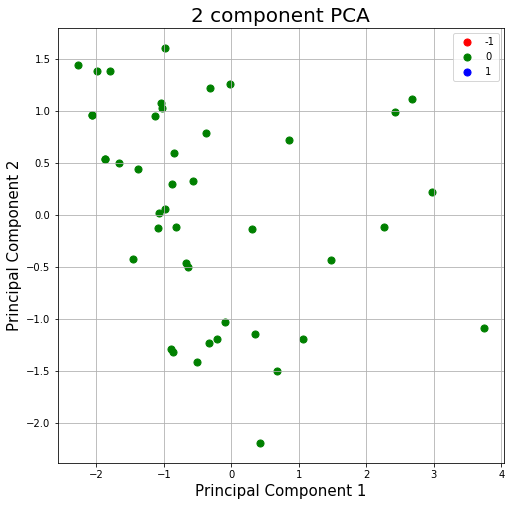

In [136]:
final_sourceDf = pd.concat([principalDf, sources_pca[['CompositeRisk']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [-1, 0, 1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_sourceDf['CompositeRisk'] == target
    ax.scatter(final_sourceDf.loc[indicesToKeep, 'principal component 1']
               , final_sourceDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()

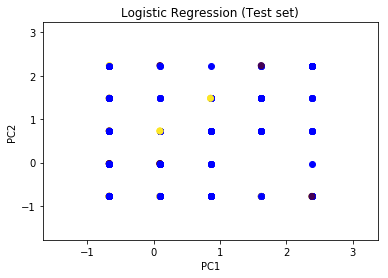

In [138]:

# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
  
X_set, y_set = X, y
  
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
  
#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             #X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             #cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
#plt.legend()
  
# show scatter plot
plt.show()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: GroupIndex, dtype: float64

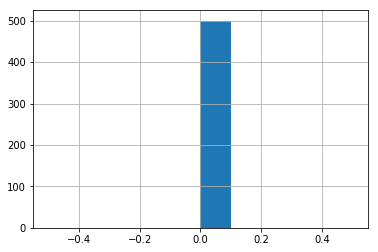

In [50]:
narrow_groups['GroupNumber'].hist()

plt.show()

# Regression Models

# Predicting Climate Risk Perceptions


In [158]:
#Creating dataframe
predict_df = pd.DataFrame()

group_df = dummy_groups
source_df = narrow_sources
hazards_df = narrow_exposure
hh_df = hh_info
risk_df = clean_salience[['HHID', 'Risk_Norm', 'SalienceIndex', 'CompositeRisk']]

merge1 = pd.merge(group_df, source_df, on='HHID')
merge2 = pd.merge(merge1, hazards_df, on='HHID')
merge3 = pd.merge(merge2, hh_info, on='HHID')
predict_df = pd.merge(merge3, risk_df, on='HHID')

cleanpredict_df = predict_df.dropna()

In [159]:
cleanpredict_df

,HHID,Women,Youth,FarmCoop,Livestock,Migrants,CFUG,Lending,GroupNumber,GroupIndex,...,Frost,Hail,Heat,HazardNumber,HazardIndex,H1,H2,Risk_Norm,SalienceIndex,CompositeRisk
0,2301006,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3,0.6,...,0.0,0.0,0.0,2,-0.831499,1,500000,0.166667,0.673077,0.112179
2,2301013,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.2,...,0.0,0.0,0.0,1,-1.673097,1,270000,0.000000,0.615385,0.000000
3,2301016,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3,0.6,...,0.0,0.0,0.0,3,0.010099,1,400000,0.500000,1.000000,0.500000
4,2301017,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.4,...,0.0,0.0,0.0,3,0.010099,1,180000,0.333333,0.692308,0.230769
5,2301021,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,0.4,...,0.0,0.0,0.0,3,0.010099,1,150000,0.166667,0.826923,0.137821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,3,0.010099,1,170000,0.666667,0.615385,0.410256
496,2611115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,2,-0.831499,1,300000,1.000000,0.653846,0.653846
497,2611117,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.2,...,0.0,0.0,0.0,2,-0.831499,0,150000,-0.166667,0.480769,-0.080128
498,2611118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,7.0,0.0,0.0,4,0.851697,0,20000,0.333333,0.634615,0.211538


In [161]:
y = cleanpredict_df['CompositeRisk']

x_1 = cleanpredict_df[['SourceIndex', 'GroupIndex', 'HazardIndex', 'H1','H2']]
             
x_1 = sm.add_constant(x_1)

est = sm.OLS(y, x_1)
est = est.fit()
est.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CompositeRisk   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.054
Date:                Tue, 04 Oct 2022   Prob (F-statistic):             0.0700
Time:                        18:06:07   Log-Likelihood:                -22.256
No. Observations:                 498   AIC:                             56.51
Df Residuals:                     492   BIC:                             81.77
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1702      0.051      3.335      0.001       0.070       0.270
SourceIndex    -0.0140      0.012     -1.181      0.238      -0.037       0.009
GroupIndex      0.0147      0.057      0.259      0.795      -0.097       0.126
HazardIndex     0.0298      0.012      2.585      0.010       0.007       0.053
H1              0.0862      0.052      1.655      0.099      -0.016       0.189
H2          -1.239e-08   4.06e-08     -0.305      0.760   -9.21e-08    6.73e-08
==============================================================================
Omnibus:                       14.139   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.561
Skew:                          -0.395   Prob(JB):                     0.000689
Kurtosis:                       3.279   Cond. No.                     2.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""